<a href="https://colab.research.google.com/github/EveTLynn/Personal_Projects/blob/main/BCG_PowerCo_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1. Files Description

### price_data.csv

● id = client company identifier

● price_date = reference date

● price_off_peak_var = price of energy for the 1st period (off peak)

● price_peak_var = price of energy for the 2nd period (peak)

● price_mid_peak_var = price of energy for the 3rd period (mid peak)

● price_off_peak_fix = price of power for the 1st period (off peak)

● price_peak_fix = price of power for the 2nd period (peak)

● price_mid_peak_fix = price of power for the 3rd period (mid peak)

### client_data.csv

● id = client company identifier

● activity_new = category of the company’s activity

● channel_sales = code of the sales channel

● cons_12m = electricity consumption of the past 12 months

● cons_gas_12m = gas consumption of the past 12 months

● cons_last_month = electricity consumption of the last month

● date_activ = date of activation of the contract

● date_end = registered date of the end of the contract

● date_modif_prod = date of the last modification of the product

● date_renewal = date of the next contract renewal

● forecast_cons_12m = forecasted electricity consumption for next 12 months

● forecast_cons_year = forecasted electricity consumption for the next calendar year

● forecast_discount_energy = forecasted value of current discount

● forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months

● forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)

● forecast_price_energy_peak = forecasted energy price for 2nd period (peak)

● forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)

● has_gas = indicated if client is also a gas client

● imp_cons = current paid consumption

● margin_gross_pow_ele = gross margin on power subscription

● margin_net_pow_ele = net margin on power subscription

● nb_prod_act = number of active products and services

● net_margin = total net margin

● num_years_antig = antiquity of the client (in number of years)

● origin_up = code of the electricity campaign the customer first subscribed to

● pow_max = subscribed power

● churn = has the client churned over the next 3 months

## Import libraries

In [ ]:
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
## Shows plots in notebook
%matplotlib inline
## Set plot style
sns.set(color_codes=True)

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE

# Task 2. Exploratory Data Analysis

---

## 2.1. Loading data with Pandas

In [ ]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

In [ ]:
client_df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t       0.0   
1      2009-08-21   2015-08-31             189.95  ...        f       0.0   
2      2010-04-16   2015-04-17              47.96  ...        f       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   

  num_years_antig                         origin_up  pow_max  churn  
0               3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  

[3 rows x 26 columns]

In [ ]:
price_df.head(3)

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0

---

## 2.2. Descriptive statistics of data

### Data types

In [ ]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [ ]:
client_numeric = client_df._get_numeric_data()
client_categorical = set(client_df.columns)- set(client_numeric)
client_categorical

{'channel_sales',
 'date_activ',
 'date_end',
 'date_modif_prod',
 'date_renewal',
 'has_gas',
 'id',
 'origin_up'}

The date are in string format which will be modify later in both client and price data, 4 categorical features in client data

In [ ]:
# format datetime
for f in ['date_activ','date_end','date_modif_prod','date_renewal']:
    client_df[f] = pd.to_datetime(client_df[f], format='%Y-%m-%d')

client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [ ]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')
price_df.head(3)

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0

In [ ]:
# Check what are in the categorical columns
categorical_cols = ['channel_sales', 'has_gas', 'origin_up']
for i in categorical_cols:
    print(i, client_df[i].unique())

channel_sales ['foosdfpfkusacimwkcsosbicdxkicaua' 'MISSING'
 'lmkebamcaaclubfxadlmueccxoimlema' 'usilxuppasemubllopkaafesmlibmsdf'
 'ewpakwlliwisiwduibdlfmalxowmwpci' 'epumfxlbckeskwekxbiuasklxalciiuu'
 'sddiedcslfslkckwlfkdpoeeailfpeds' 'fixdbufsefwooaasfcxdxadsiekoceaa']
has_gas ['t' 'f']
origin_up ['lxidpiddsbxsbosboudacockeimpuepw' 'kamkkxfxxuwbdslkwifmmcsiusiuosws'
 'ldkssxwpmemidmecebumciepifcamkci' 'MISSING'
 'usapbepcfoloekilkwsdiboslwaxobdp' 'ewxeelcelemmiwuafmddpobolfuxioce']


The values in channel_sales and origin_up are too long and have no meaning. I'll encode them with numerical values.

For column has_gas, t and f will be turn into 1 and 0 respectively.

In [ ]:
# encode the label
channel_encoder = LabelEncoder()
client_df['channel_sales'] = channel_encoder.fit_transform(client_df['channel_sales'])
origin_encoder = LabelEncoder()
client_df['origin_up'] = origin_encoder.fit_transform(client_df['origin_up'])

client_df.loc[(client_df['has_gas']=='t'),'has_gas'] = 1
client_df.loc[(client_df['has_gas']=='f'),'has_gas'] = 0

# check if the label has encoded sucessfully
for i in categorical_cols:
    print(i, client_df[i].unique())

channel_sales [4 0 5 7 2 1 6 3]
has_gas [1 0]
origin_up [4 2 3 0 5 1]


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [ ]:
client_df.describe()

channel_sales      cons_12m  cons_gas_12m  cons_last_month  \
count   14606.000000  1.460600e+04  1.460600e+04     14606.000000   
mean        3.266945  1.592203e+05  2.809238e+04     16090.269752   
std         2.183223  5.734653e+05  1.629731e+05     64364.196422   
min         0.000000  0.000000e+00  0.000000e+00         0.000000   
25%         0.000000  5.674750e+03  0.000000e+00         0.000000   
50%         4.000000  1.411550e+04  0.000000e+00       792.500000   
75%         4.000000  4.076375e+04  0.000000e+00      3383.000000   
max         7.000000  6.207104e+06  4.154590e+06    771203.000000   

       forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
count       14606.000000        14606.000000              14606.000000   
mean         1868.614880         1399.762906                  0.966726   
std          2387.571531         3247.786255                  5.108289   
min             0.000000            0.000000                  0.000000   
25%           494.995000            0.000000                  0.000000   
50%          1112.875000          314.000000                  0.000000   
75%          2401.790000         1745.750000                  0.000000   
max         82902.830000       175375.000000                 30.000000   

       forecast_meter_rent_12m  forecast_price_energy_off_peak  \
count             14606.000000                    14606.000000   
mean                 63.086871                        0.137283   
std                  66.165783                        0.024623   
min                   0.000000                        0.000000   
25%                  16.180000                        0.116340   
50%                  18.795000                        0.143166   
75%                 131.030000                        0.146348   
max                 599.310000                        0.273963   

       forecast_price_energy_peak  forecast_price_pow_off_peak      imp_cons  \
count                14606.000000                 14606.000000  14606.000000   
mean                     0.050491                    43.130056    152.786896   
std                      0.049037                     4.485988    341.369366   
min                      0.000000                     0.000000      0.000000   
25%                      0.000000                    40.606701      0.000000   
50%                      0.084138                    44.311378     37.395000   
75%                      0.098837                    44.311378    193.980000   
max                      0.195975                    59.266378  15042.790000   

       margin_gross_pow_ele  margin_net_pow_ele   nb_prod_act    net_margin  \
count          14606.000000        14606.000000  14606.000000  14606.000000   
mean              24.565121           24.562517      1.292346    189.264522   
std               20.231172           20.230280      0.709774    311.798130   
min                0.000000            0.000000      1.000000      0.000000   
25%               14.280000           14.280000      1.000000     50.712500   
50%               21.640000           21.640000      1.000000    112.530000   
75%               29.880000           29.880000      1.000000    243.097500   
max              374.640000          374.640000     32.000000  24570.650000   

       num_years_antig     origin_up       pow_max         churn  
count     14606.000000  14606.000000  14606.000000  14606.000000  
mean          4.997809      3.178899     18.135136      0.097152  
std           1.611749      0.887801     13.534743      0.296175  
min           1.000000      0.000000      3.300000      0.000000  
25%           4.000000      2.000000     12.500000      0.000000  
50%           5.000000      3.000000     13.856000      0.000000  
75%           6.000000      4.000000     19.172500      0.000000  
max          13.000000      5.000000    320.000000      1.000000

In [ ]:
price_df.describe()

price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000  
50%             44.266930        0.000000            0.000000  
75%             44.444710       24.339581           16.226389  
max             59.444710       36.490692           17.458221

### Missing and duplicate values

In [ ]:
# The % of missing values in each columns
client_df.isnull().sum()/len(client_df)*100

id                                0.0
channel_sales                     0.0
cons_12m                          0.0
cons_gas_12m                      0.0
cons_last_month                   0.0
date_activ                        0.0
date_end                          0.0
date_modif_prod                   0.0
date_renewal                      0.0
forecast_cons_12m                 0.0
forecast_cons_year                0.0
forecast_discount_energy          0.0
forecast_meter_rent_12m           0.0
forecast_price_energy_off_peak    0.0
forecast_price_energy_peak        0.0
forecast_price_pow_off_peak       0.0
has_gas                           0.0
imp_cons                          0.0
margin_gross_pow_ele              0.0
margin_net_pow_ele                0.0
nb_prod_act                       0.0
net_margin                        0.0
num_years_antig                   0.0
origin_up                         0.0
pow_max                           0.0
churn                             0.0
dtype: float

In [ ]:
price_df.isnull().sum()/len(price_df)*100

id                    0.0
price_date            0.0
price_off_peak_var    0.0
price_peak_var        0.0
price_mid_peak_var    0.0
price_off_peak_fix    0.0
price_peak_fix        0.0
price_mid_peak_fix    0.0
dtype: float64

There's no columns with missing values 😃

In [ ]:
# check for duplicate ids
print("The number of id in client_df: ", len(client_df))
print("The number of unique id in client_df: ", client_df.id.nunique())
print("The number of id in price_df: ", len(price_df))
print("The number of unique id in price_df: ", price_df.id.nunique())

The number of id in client_df:  14606
The number of unique id in client_df:  14606
The number of id in price_df:  193002
The number of unique id in price_df:  16096


It seems like one client might have repeated price observations

---

## 2.3. Data visualization

### 2.3.1. Clients data

In [ ]:
client_df.churn.value_counts()

0    13187
1     1419
Name: churn, dtype: int64

In [ ]:
def plot_bar_chart_with_percent_label(df, target_variable, gap_label_bar=0, figsize=(9,6)):
    # prepare data
    plot_data = df[[target_variable]].value_counts().reset_index(name='count')
    plot_data['percent'] = plot_data['count']/plot_data['count'].sum()

    # plot
    fig = plt.figure(figsize=figsize)
    ax = sns.barplot(data=plot_data, x=target_variable, y='percent')
    # add label
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height() + gap_label_bar
        ax.annotate(text='{:.2f}%'.format(p.get_height()*100), xy=(x, y), ha='center')
    ax.margins(y=0.1)

# plot stacked bar chart with percent label by churn
def plot_stacked_bar_with_percent_label_by_churn(df, target_variable, figsize=(9,6)):
    plot_data = df.groupby([target_variable,'churn']).size().reset_index(name='count')
    plot_data = plot_data.pivot(index=target_variable, columns='churn', values='count').fillna(0)
    plot_data = plot_data.div(plot_data.sum(axis=1), axis=0)

    ax = plot_data.plot(kind='bar', rot=False, stacked=True, figsize=figsize)
    plt.legend(['Retention', 'Churn'], loc='upper center', ncol=2)
    # add label
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height()*100)
        if percentage!='0.0%':
            x = p.get_x() + p.get_width()/2
            y = 1 - p.get_height()/1.8
            ax.annotate(text=percentage, xy=(x, y), ha='center')
    ax.margins(y=0.1)

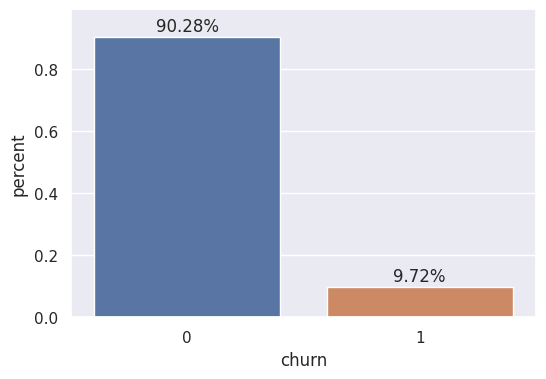

In [ ]:
# plot bar chart to see churn rate
plot_bar_chart_with_percent_label(df=client_df,target_variable='churn',
                                  gap_label_bar=0.02, figsize=(6,4))

#### Chanel sales

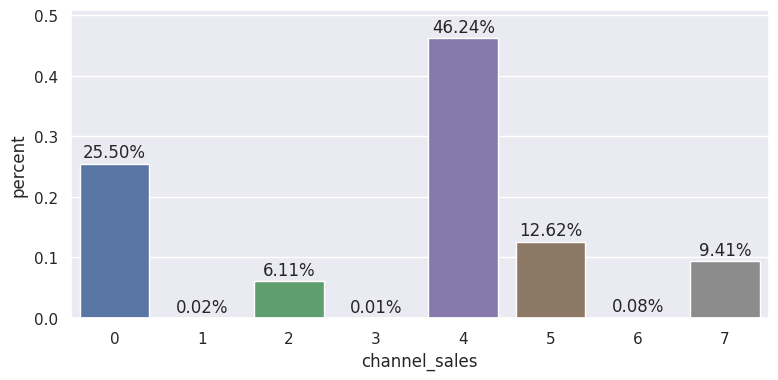

In [ ]:
# % of client of each channel sale
plot_bar_chart_with_percent_label(df=client_df, target_variable='channel_sales',
                                  gap_label_bar=0.01, figsize=(9,4))

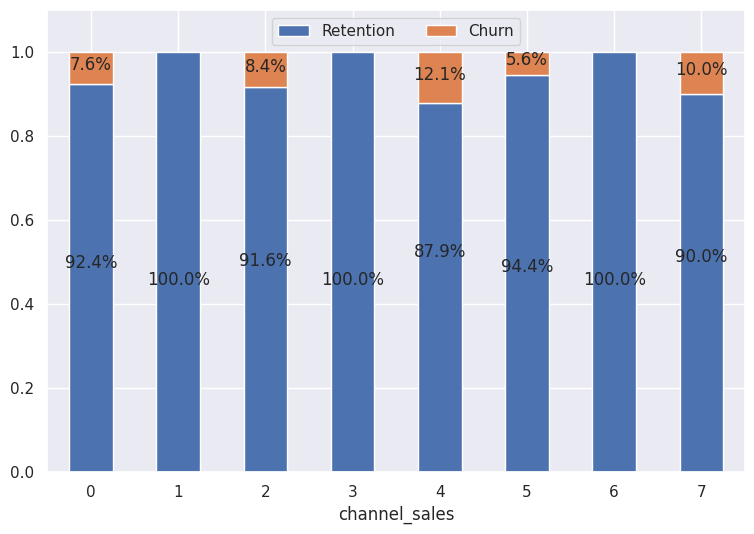

In [ ]:
# churn rate by chanel_sales
plot_stacked_bar_with_percent_label_by_churn(df=client_df, target_variable='channel_sales')

#### Consumption

Check the consumption of client last month and the last 12 months

In [ ]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
                         'imp_cons', 'has_gas', 'churn']]

In [ ]:
# create a function to plot stacked histogram
def plot_histogram(df, cols, ax, bins=50):
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": df[df["churn"]==0][cols],
                         "Churn":df[df["churn"]==1][cols]})
    # plot histogram
    sns.histplot(data=temp, ax=ax, bins=bins, multiple="stack")
    ax.set_xlabel(cols)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

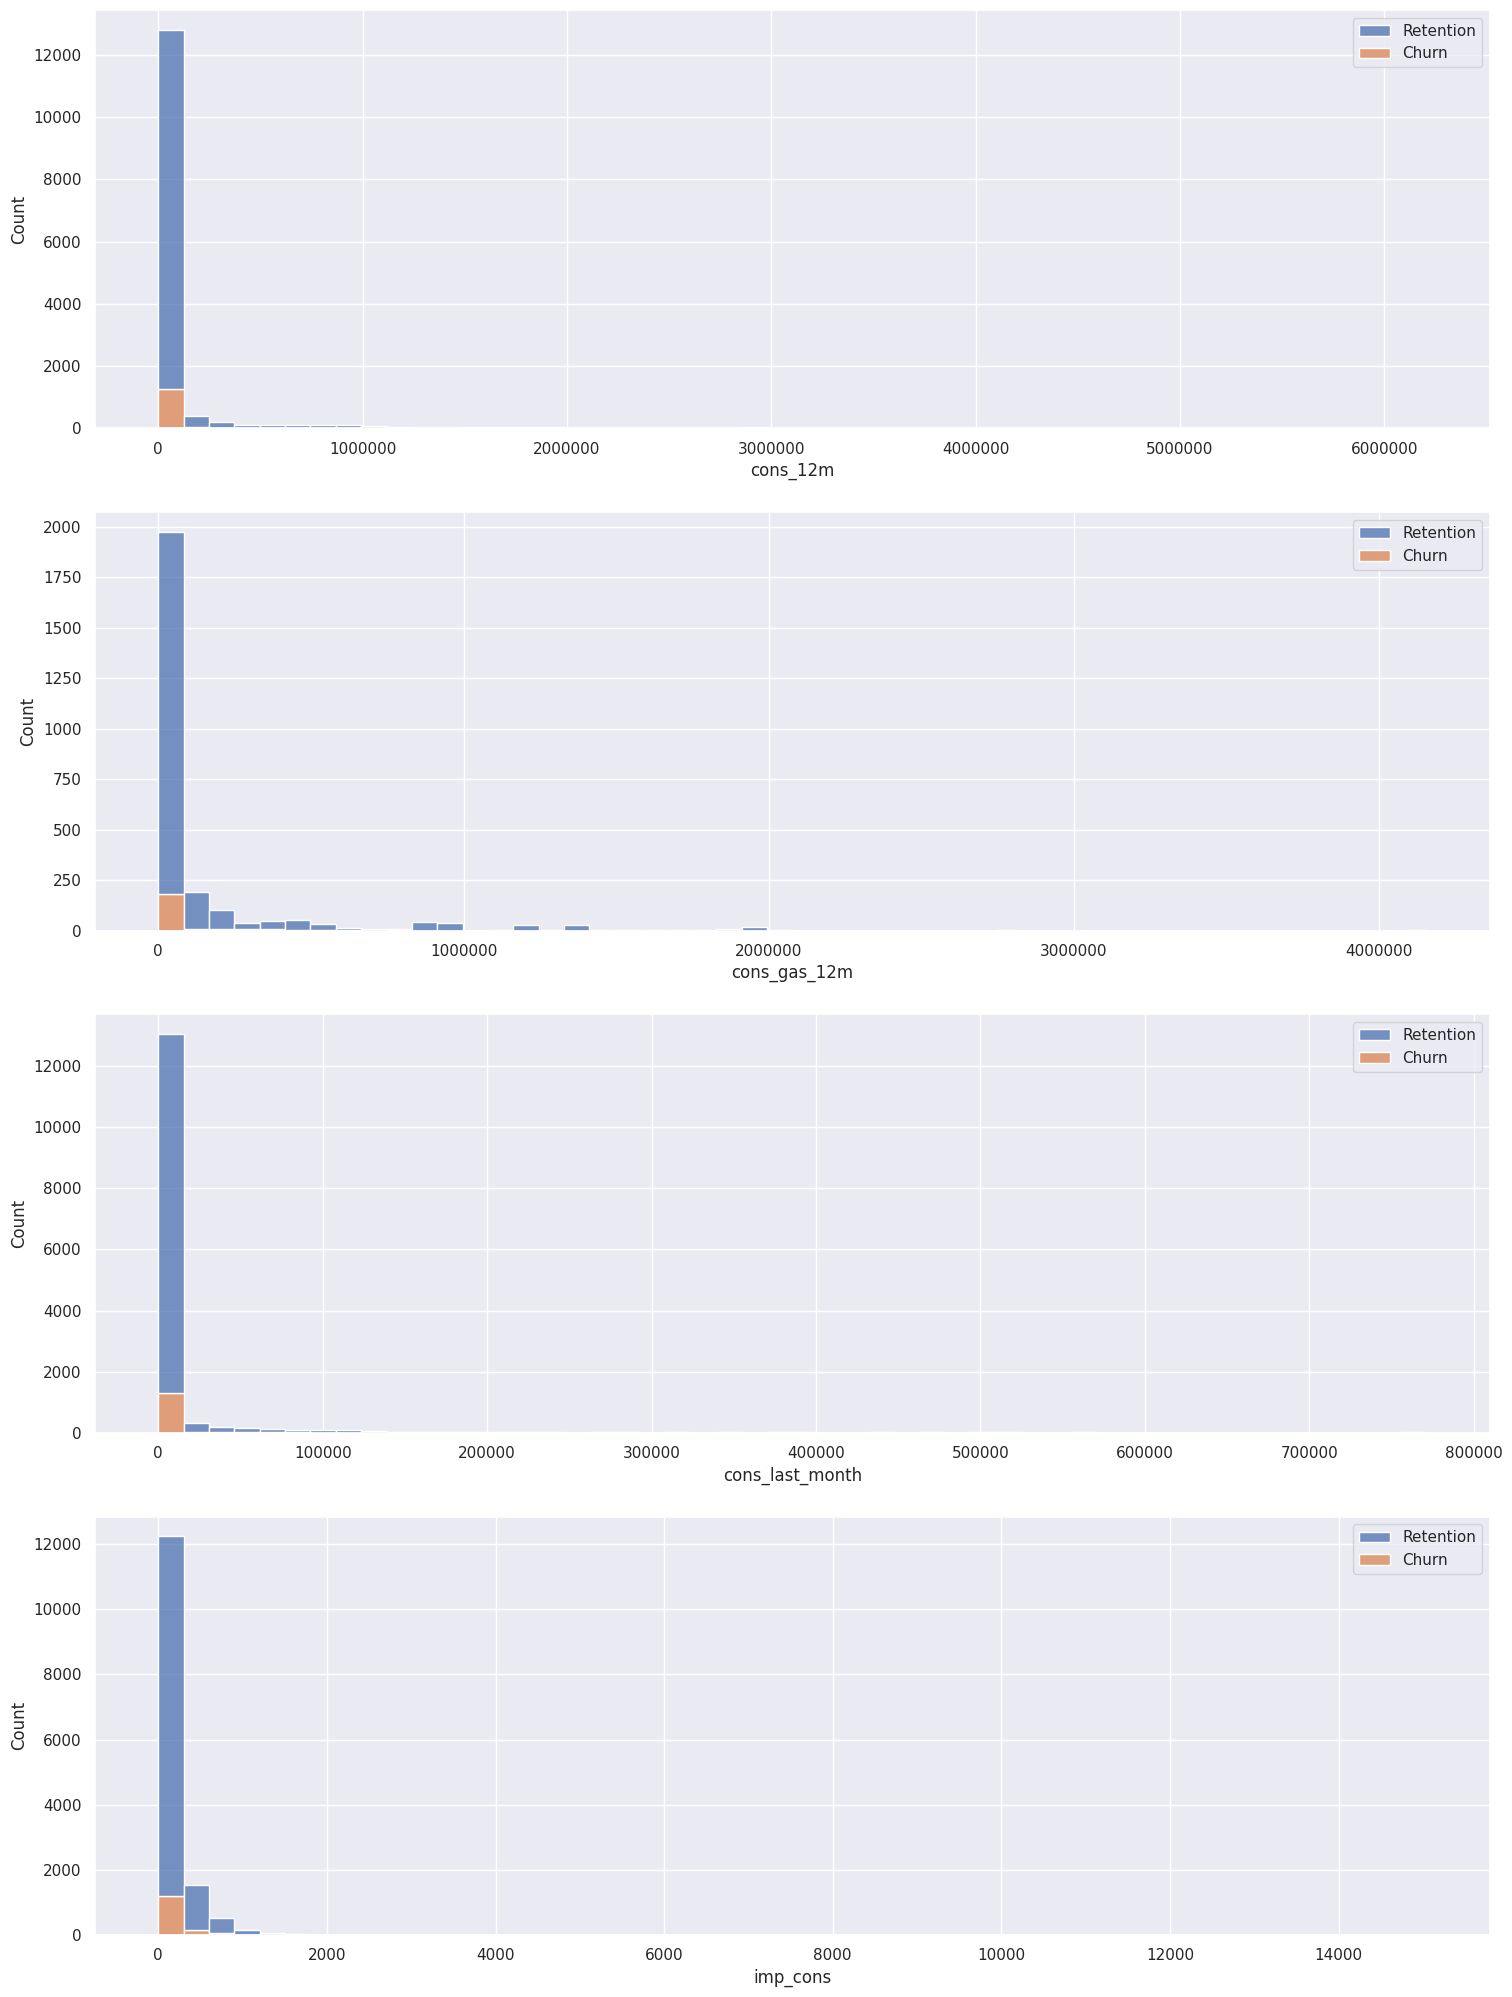

In [ ]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_histogram(consumption, 'cons_12m', axs[0])
plot_histogram(consumption[consumption['has_gas'] == 1], 'cons_gas_12m', axs[1])
plot_histogram(consumption, 'cons_last_month', axs[2])
plot_histogram(consumption, 'imp_cons', axs[3])

The consumption is highly right-skewed, this may be due to outliers on the higher values. Let's create boxplot to see the outliers.

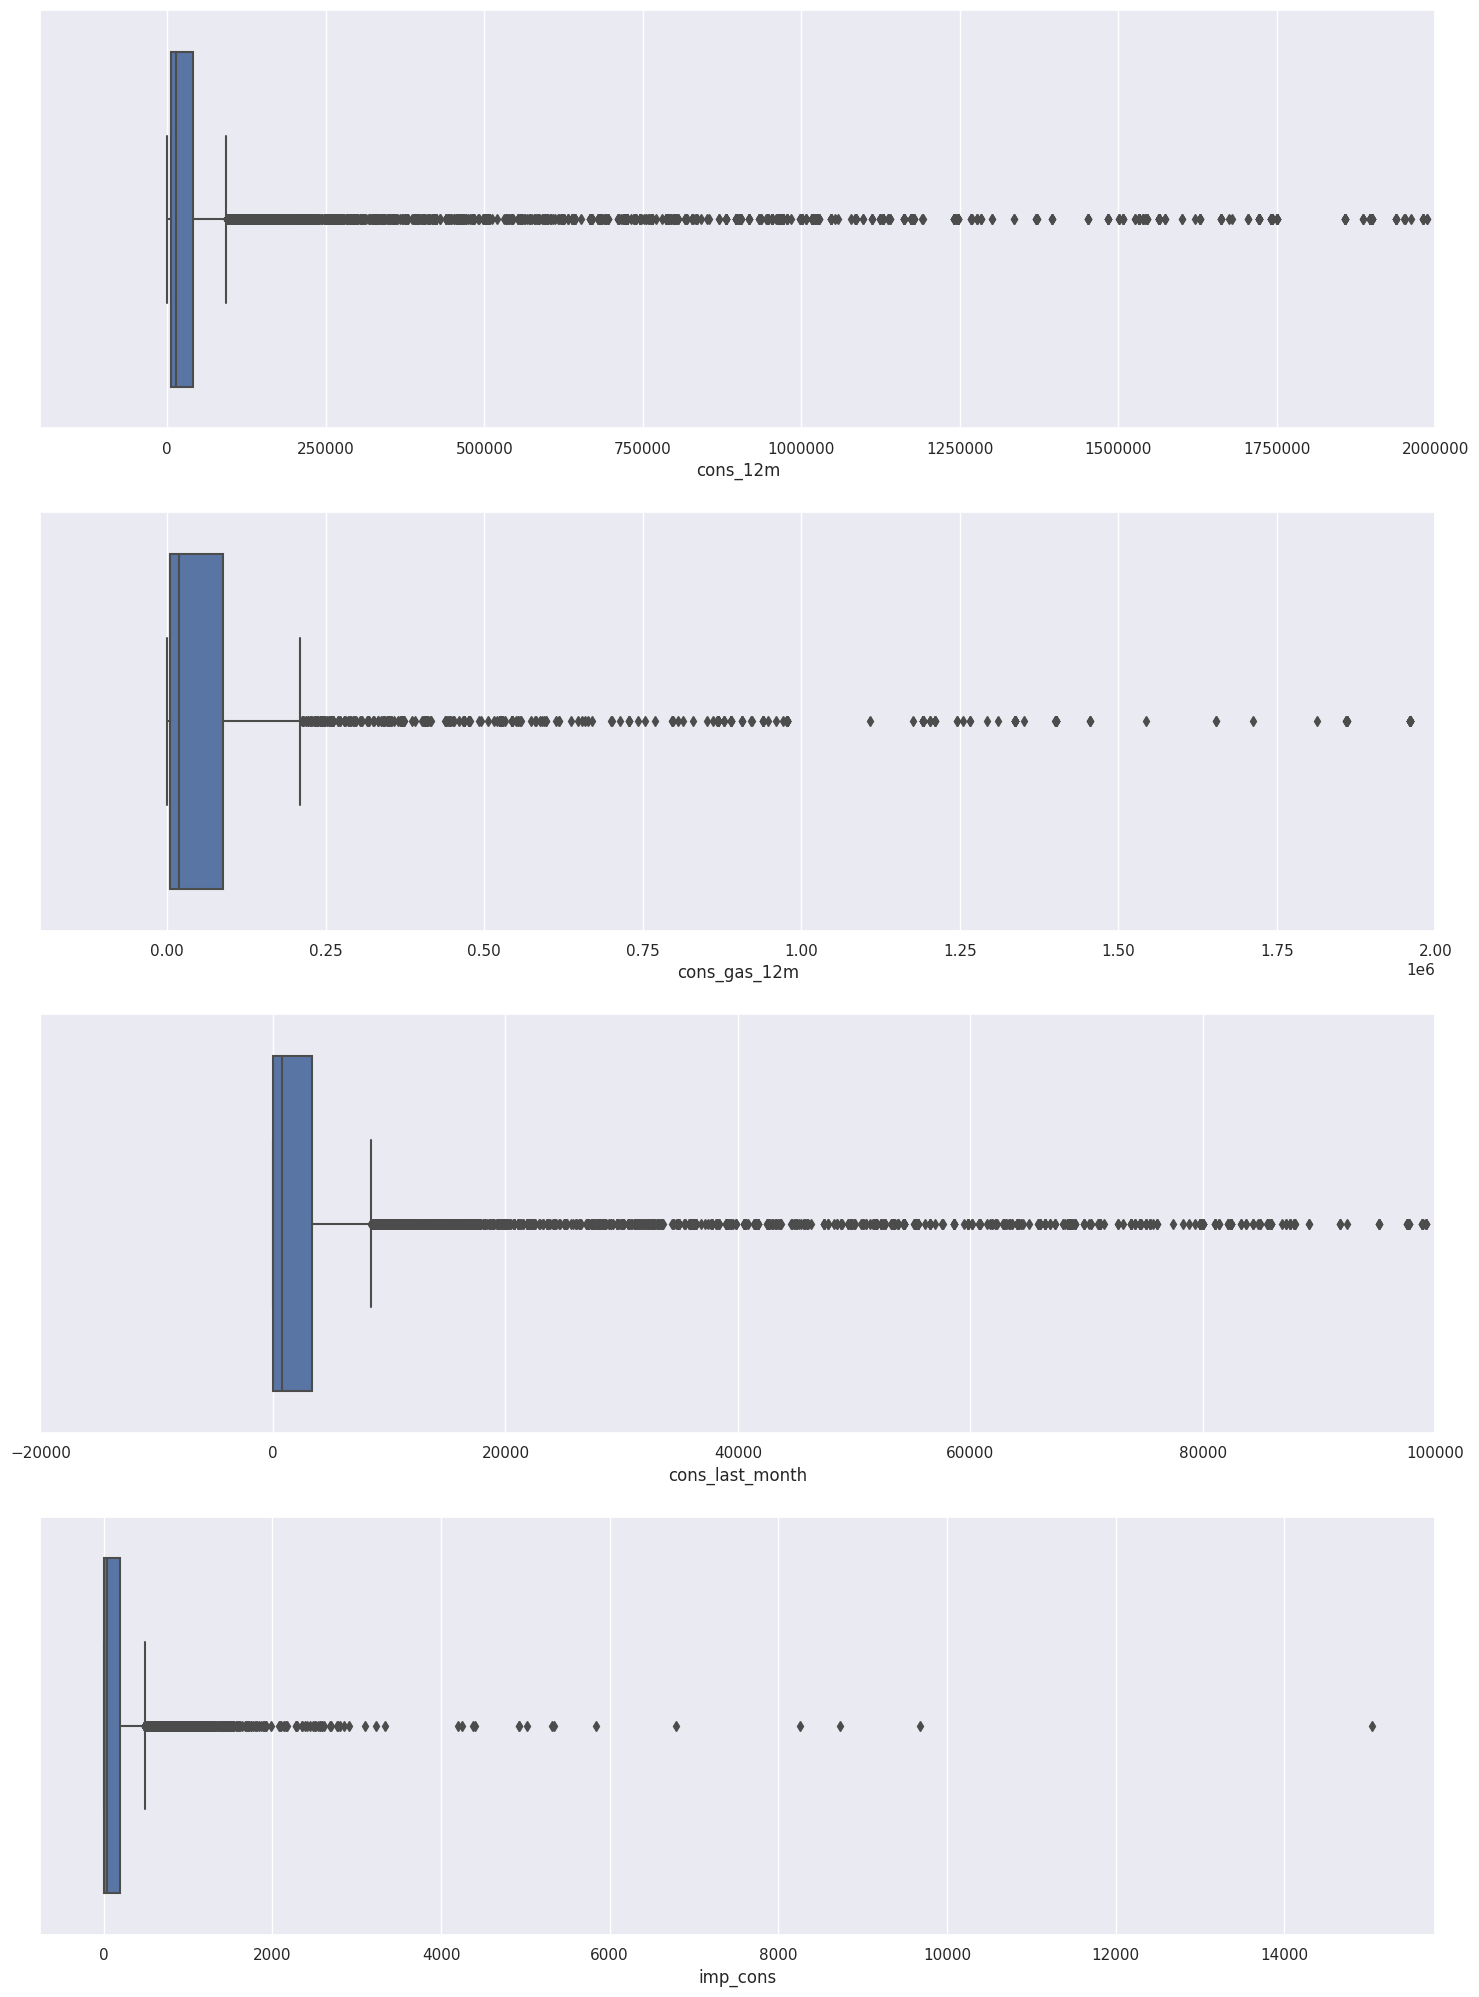

In [ ]:
fig, axes = plt.subplots(nrows=4,figsize=(18,25))

# Plot histogram
sns.boxplot(data=consumption, x='cons_12m', ax=axes[0])
sns.boxplot(data=consumption[consumption['has_gas']==1], x='cons_gas_12m', ax=axes[1])
sns.boxplot(data=consumption, x='cons_last_month', ax=axes[2])
sns.boxplot(data=consumption, x='imp_cons', ax=axes[3])
# Remove scientific notation
for ax in axes:
    ax.ticklabel_format(style='plain', axis='x')
    # Set x-axis limit
    axes[0].set_xlim(-200000, 2000000)
    axes[1].set_xlim(-200000, 2000000)
    axes[2].set_xlim(-20000, 100000)
    plt.show()

I will handle outliers in feature engineering section.

#### Forecast columns

In [ ]:
forecast = client_df[
    ["id", "forecast_cons_12m",
    "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak",
    "forecast_price_pow_off_peak","churn"
    ]
]

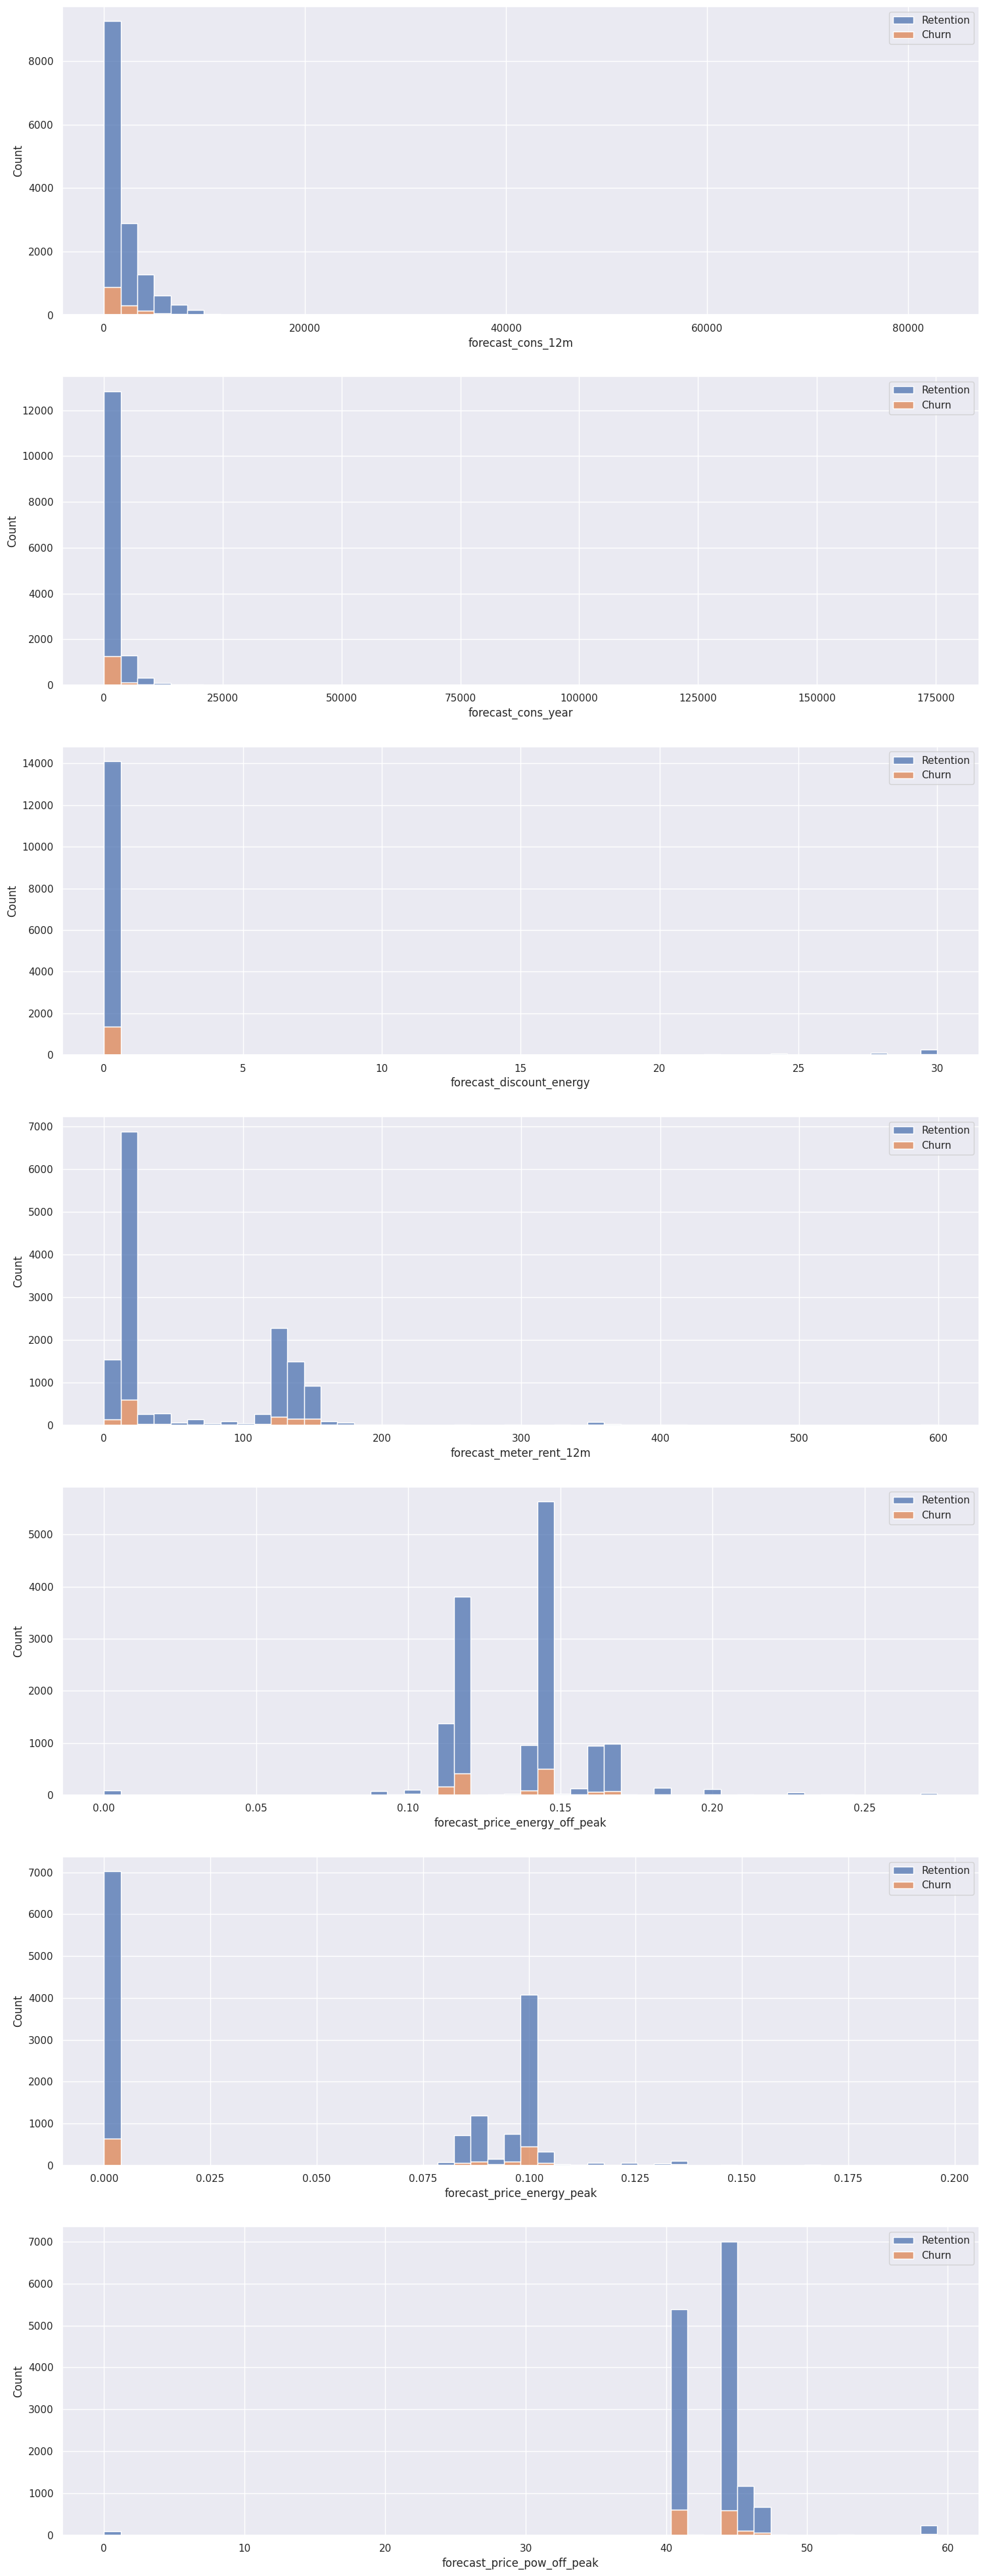

In [ ]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_histogram(client_df, "forecast_cons_12m", axs[0])
plot_histogram(client_df, "forecast_cons_year", axs[1])
plot_histogram(client_df, "forecast_discount_energy", axs[2])
plot_histogram(client_df, "forecast_meter_rent_12m", axs[3])
plot_histogram(client_df, "forecast_price_energy_off_peak", axs[4])
plot_histogram(client_df, "forecast_price_energy_peak", axs[5])
plot_histogram(client_df, "forecast_price_pow_off_peak", axs[6])

Forecast columns also skewed. Deal with this in feature engineering section.

#### has_gas

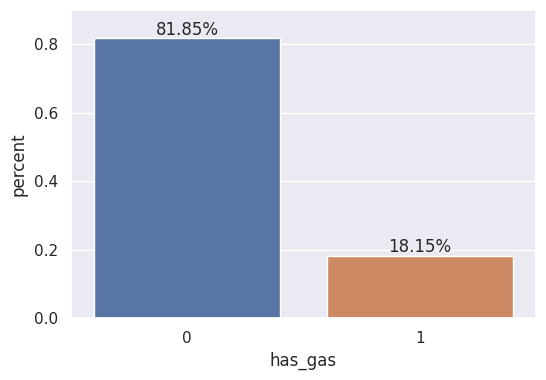

In [ ]:
# Around 18% of client also subscribe to gas service
plot_bar_chart_with_percent_label(df=client_df, target_variable='has_gas', gap_label_bar=0.01, figsize=(6,4))

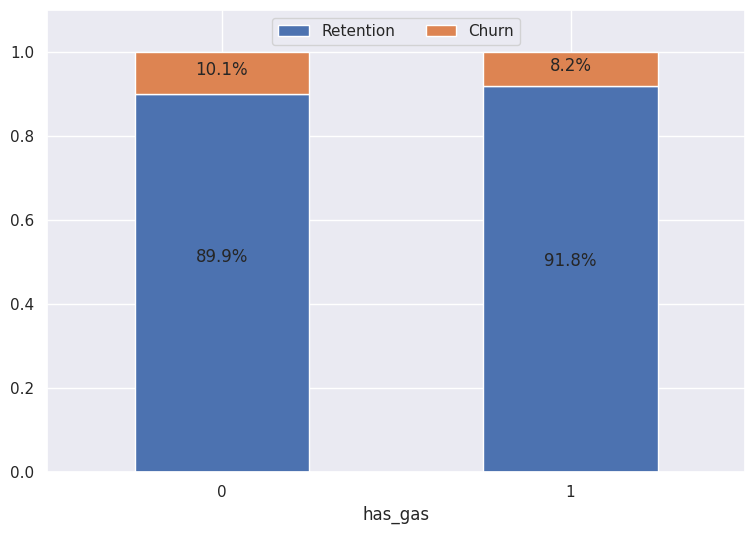

In [ ]:
plot_stacked_bar_with_percent_label_by_churn(df = client_df, target_variable='has_gas')

#### Margin


In [ ]:
margin = client_df[['id','churn','margin_gross_pow_ele','margin_net_pow_ele','net_margin']]

<Axes: xlabel='net_margin'>

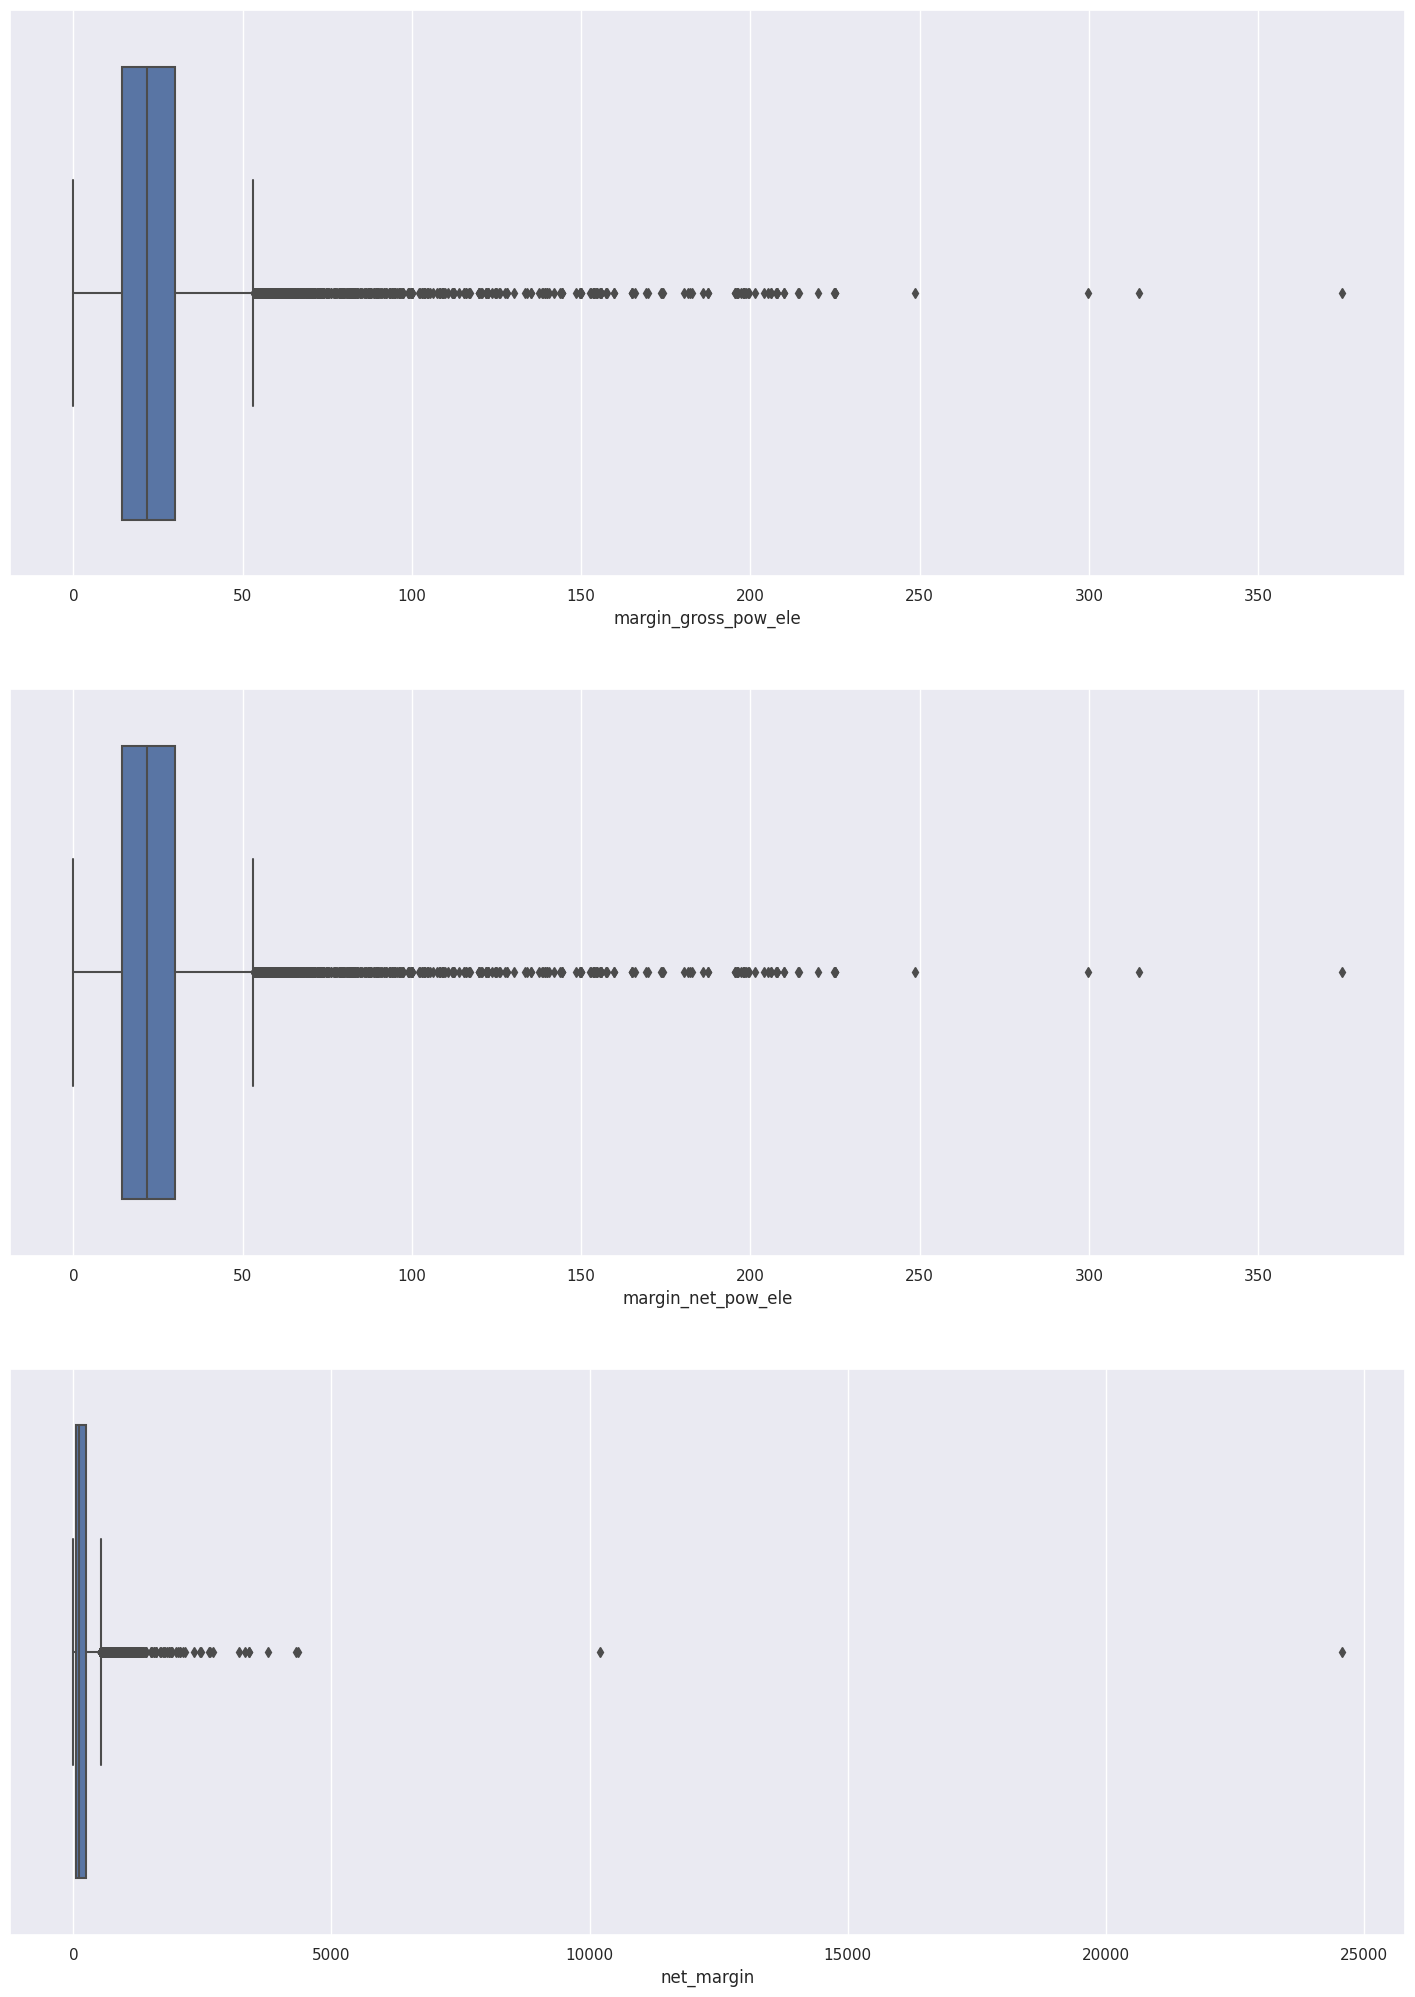

In [ ]:
fig, axes = plt.subplots(nrows=3,figsize=(18,25))

# Plot histogram
sns.boxplot(data=margin, x='margin_gross_pow_ele', ax=axes[0])
sns.boxplot(data=margin, x='margin_net_pow_ele', ax=axes[1])
sns.boxplot(data=margin, x='net_margin', ax=axes[2])

#### Subscribed power

In [ ]:
power = client_df[['id','churn','pow_max']]

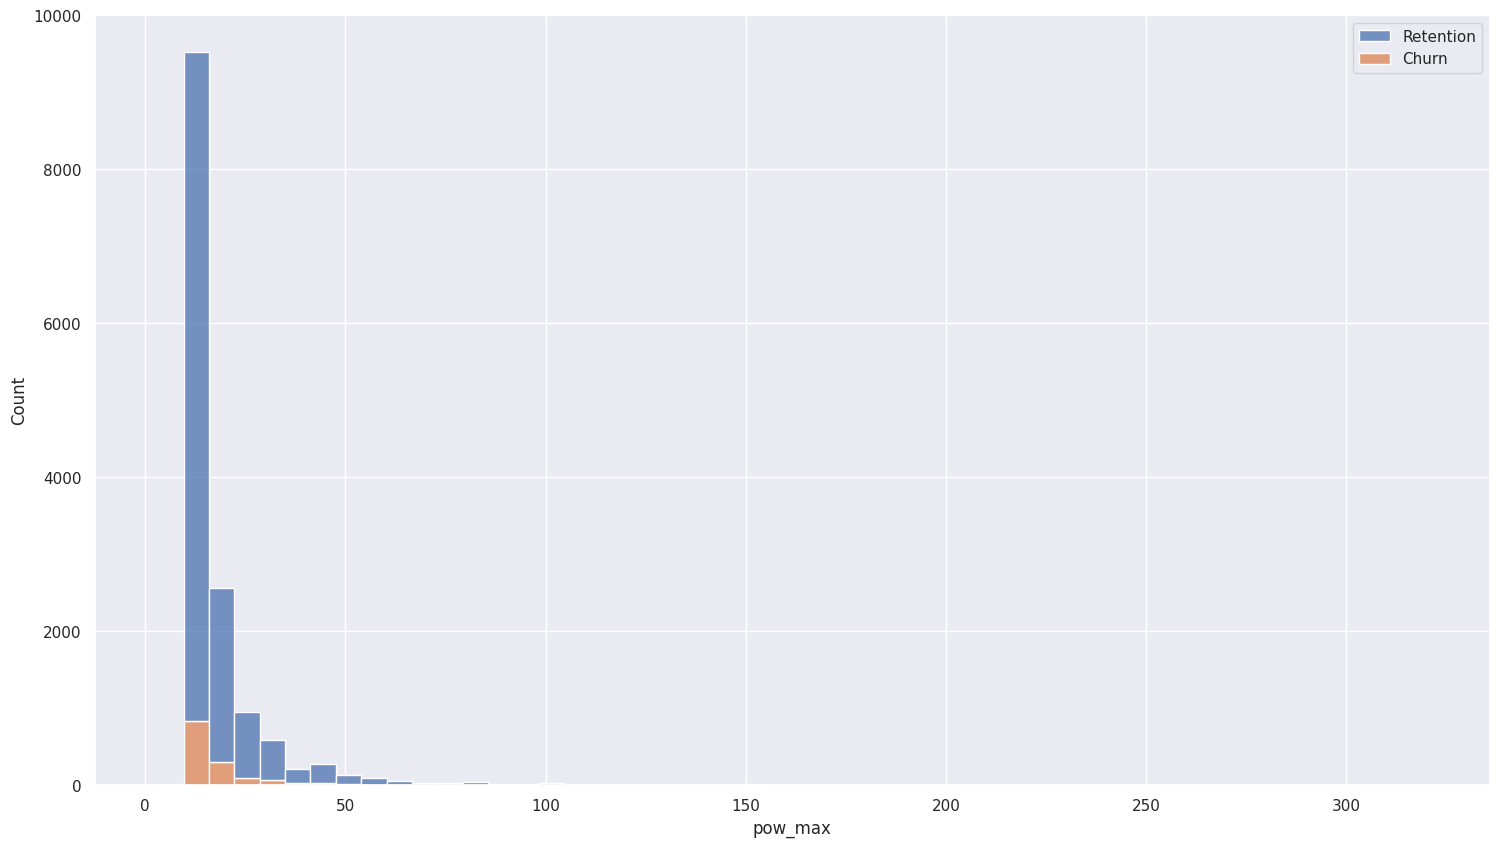

In [ ]:
fig, axes = plt.subplots(nrows=1, figsize=(18,10))
plot_histogram(power, 'pow_max', axes)

#### Other columns

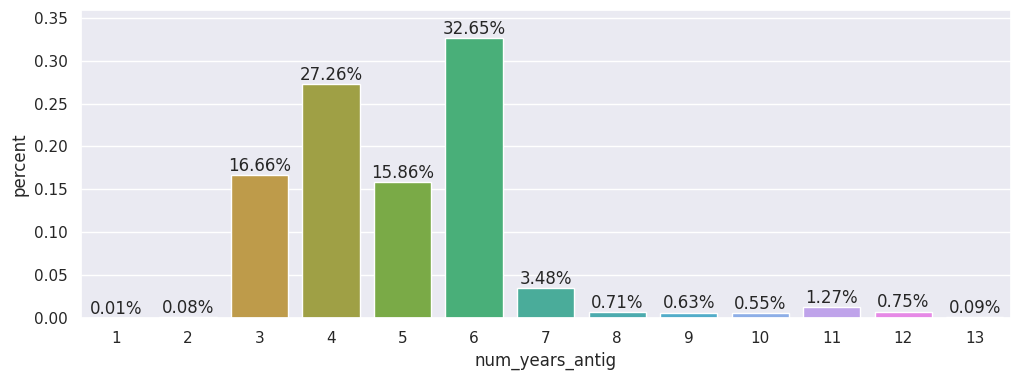

In [ ]:
# Most of the clients coporate with PowerGo for 3-6 years
plot_bar_chart_with_percent_label(df=client_df, target_variable='num_years_antig', gap_label_bar=0.005, figsize=(12,4))

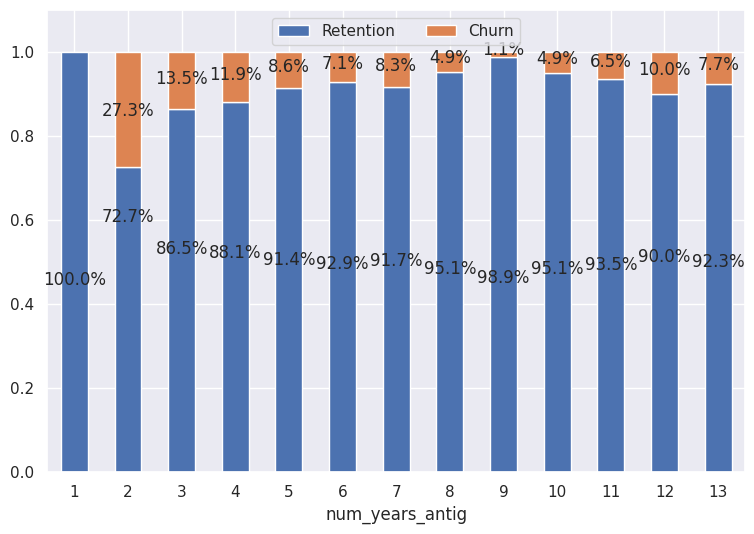

In [ ]:
plot_stacked_bar_with_percent_label_by_churn(client_df, 'num_years_antig')

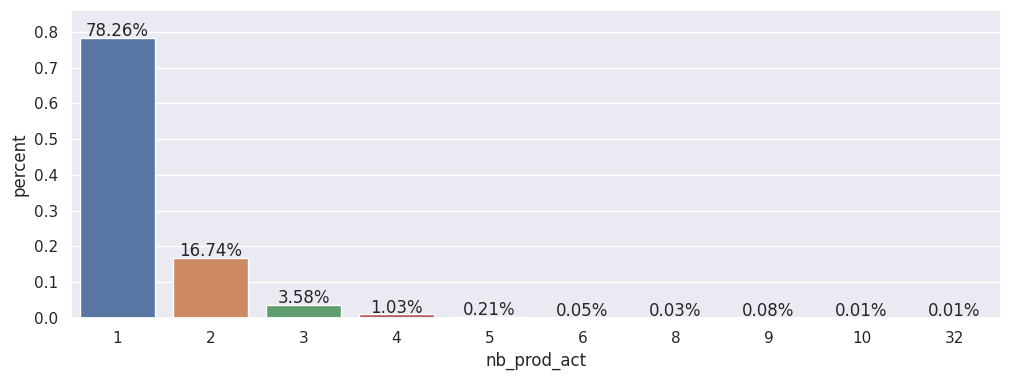

In [ ]:
plot_bar_chart_with_percent_label(df=client_df, target_variable='nb_prod_act', gap_label_bar=0.005, figsize=(12,4))

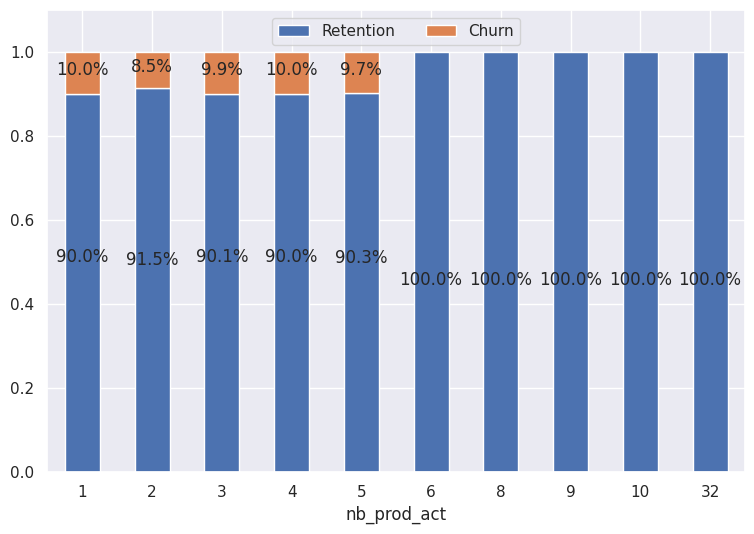

In [ ]:
plot_stacked_bar_with_percent_label_by_churn(client_df, 'nb_prod_act')

### 2.3.2. Price Data

In [ ]:
# As found in the duplicates values section, clients seem to have multiple price data
price_df['id'].value_counts().value_counts()

12    15990
11       83
10       11
9         6
8         3
7         3
Name: id, dtype: int64

[]

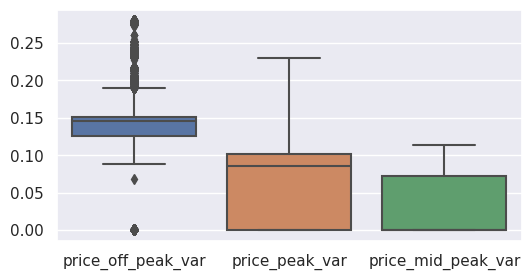

In [ ]:
# Boxplot for checking the price distribution
## enegry price
plt.figure(figsize=(6,3))
sns.boxplot(data=price_df[['price_off_peak_var','price_peak_var','price_mid_peak_var']])
plt.plot()

[]

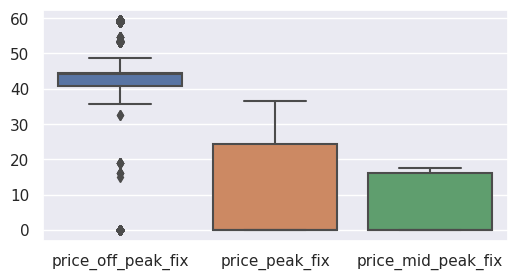

In [ ]:
## power price
plt.figure(figsize=(6,3))
sns.boxplot(data=price_df[['price_off_peak_fix','price_peak_fix','price_mid_peak_fix']])
plt.plot()

From the boxplots it seems like the price_off peak varies while the price peak and mid peak seem to have lots of 0 => Create the dataframe to check

In [ ]:
df=pd.DataFrame(columns=['price_type','%num_zeros'])
l = ['price_off_peak_var','price_peak_var','price_mid_peak_var',
     'price_off_peak_fix','price_peak_fix','price_mid_peak_fix']

for i in l:
    num_zeros = price_df[i].eq(0).sum()/len(price_df)*100
    d = {'price_type':i, '%num_zeros':num_zeros}

    df = df.append(d, ignore_index=True)

df

<ipython-input-80-ca868317d5db>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d, ignore_index=True)
<ipython-input-80-ca868317d5db>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d, ignore_index=True)
<ipython-input-80-ca868317d5db>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d, ignore_index=True)
<ipython-input-80-ca868317d5db>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d, ignore_index=True)
<ipython-input-80-ca868317d5db>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

price_type  %num_zeros
0  price_off_peak_var    0.179273
1      price_peak_var   44.974663
2  price_mid_peak_var   58.462607
3  price_off_peak_fix    0.772013
4      price_peak_fix   58.547580
5  price_mid_peak_fix   58.546544

As you can see, around 50% of peak and off peak price is 0, I assumed that the price does not change during the period recorded = > I'll replace them with off peak or peak values


In [ ]:
# Create a df of price and churn status
df_churn = price_df
df_churn.loc[df_churn['price_peak_var'] == 0, 'price_peak_var'] = df_churn['price_off_peak_var']
df_churn.loc[df_churn['price_mid_peak_var'] == 0, 'price_mid_peak_var'] = df_churn['price_peak_var']
df_churn.loc[df_churn['price_peak_fix'] == 0, 'price_peak_fix'] = df_churn['price_off_peak_fix']
df_churn.loc[df_churn['price_mid_peak_fix'] == 0, 'price_mid_peak_fix'] = df_churn['price_peak_fix']
df_churn

id price_date  price_off_peak_var  \
0       038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1       038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2       038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3       038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4       038af19179925da21a25619c5a24b745 2015-05-01            0.149626   
...                                  ...        ...                 ...   
192997  16f51cdc2baa19af0b940ee1b3dd17d5 2015-08-01            0.119916   
192998  16f51cdc2baa19af0b940ee1b3dd17d5 2015-09-01            0.119916   
192999  16f51cdc2baa19af0b940ee1b3dd17d5 2015-10-01            0.119916   
193000  16f51cdc2baa19af0b940ee1b3dd17d5 2015-11-01            0.119916   
193001  16f51cdc2baa19af0b940ee1b3dd17d5 2015-12-01            0.119916   

        price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0             0.151367            0.151367           44.266931   
1             0.151367            0.151367           44.266931   
2             0.151367            0.151367           44.266931   
3             0.149626            0.149626           44.266931   
4             0.149626            0.149626           44.266931   
...                ...                 ...                 ...   
192997        0.102232            0.076257           40.728885   
192998        0.102232            0.076257           40.728885   
192999        0.102232            0.076257           40.728885   
193000        0.102232            0.076257           40.728885   
193001        0.102232            0.076257           40.728885   

        price_peak_fix  price_mid_peak_fix  
0            44.266931           44.266931  
1            44.266931           44.266931  
2            44.266931           44.266931  
3            44.266931           44.266931  
4            44.266931           44.266931  
...                ...                 ...  
192997       24.437330           16.291555  
192998       24.437330           16.291555  
192999       24.437330           16.291555  
193000       24.437330           16.291555  
193001       24.437330           16.291555  

[193002 rows x 8 columns]

## 2.4. Check the hypothesis
The changes in price is correlated to churn rate

In [ ]:
# Calulate the mean value of all the peak
df_churn['price_var'] = (df_churn['price_off_peak_var']+df_churn['price_peak_var']+df_churn['price_mid_peak_var'])/3
df_churn['price_fix'] = (df_churn['price_off_peak_fix']+df_churn['price_peak_fix']+df_churn['price_mid_peak_fix'])/3

# get the max and the min of price by each id to see if the price has change for the customer
df_churn_new = df_churn.groupby('id').aggregate({'price_var':['max','min'],'price_fix':['max','min']})
df_churn_new.columns = ['_'.join(x) for x in zip(df_churn_new.columns.get_level_values(0), df_churn_new.columns.get_level_values(1))]
df_churn_new = df_churn_new.reset_index()
df_churn_new

id  price_var_max  price_var_min  \
0      0002203ffbb812588b632b9e628cc38d       0.102561       0.098433   
1      0004351ebdd665e6ee664792efc4fd13       0.148405       0.143943   
2      0010bcc39e42b3c2131ed2ce55246e3c       0.205742       0.150837   
3      00114d74e963e47177db89bc70108537       0.149902       0.145440   
4      0013f326a839a2f6ad87a1859952d227       0.104301       0.100173   
...                                 ...            ...            ...   
14601  ffebf6a979dd0b17a41076df1057e733       0.101004       0.095754   
14602  fffac626da707b1b5ab11e8431a4d0a2       0.148825       0.144363   
14603  fffc0cacd305dd51f316424bbb08d1bd       0.129803       0.123221   
14604  fffe4f5646aa39c7f97f95ae2679ce64       0.102160       0.097727   
14605  ffff7fa066f1fb305ae285bb03bf325a       0.103770       0.099468   

       price_fix_max  price_fix_min  
0          27.152590      27.043980  
1          44.444710      44.266931  
2          45.944710      44.444710  
3          44.266931      44.266930  
4          27.152590      27.152590  
...              ...            ...  
14601      27.152590      27.043978  
14602      44.444710      44.266930  
14603      27.652590      27.541980  
14604      27.152590      27.043978  
14605      27.152590      27.043978  

[14606 rows x 5 columns]

In [ ]:
# calculate the differnce in max and min price for each customer
df_churn_new['price_var_diff'] = df_churn_new['price_var_max']-df_churn_new['price_var_min']
df_churn_new['price_fix_diff'] = df_churn_new['price_fix_max']-df_churn_new['price_fix_min']
df_churn_new

id  price_var_max  price_var_min  \
0      0002203ffbb812588b632b9e628cc38d       0.102561       0.098433   
1      0004351ebdd665e6ee664792efc4fd13       0.148405       0.143943   
2      0010bcc39e42b3c2131ed2ce55246e3c       0.205742       0.150837   
3      00114d74e963e47177db89bc70108537       0.149902       0.145440   
4      0013f326a839a2f6ad87a1859952d227       0.104301       0.100173   
...                                 ...            ...            ...   
14601  ffebf6a979dd0b17a41076df1057e733       0.101004       0.095754   
14602  fffac626da707b1b5ab11e8431a4d0a2       0.148825       0.144363   
14603  fffc0cacd305dd51f316424bbb08d1bd       0.129803       0.123221   
14604  fffe4f5646aa39c7f97f95ae2679ce64       0.102160       0.097727   
14605  ffff7fa066f1fb305ae285bb03bf325a       0.103770       0.099468   

       price_fix_max  price_fix_min  price_var_diff  price_fix_diff  
0          27.152590      27.043980        0.004128        0.108610  
1          44.444710      44.266931        0.004462        0.177779  
2          45.944710      44.444710        0.054905        1.500000  
3          44.266931      44.266930        0.004462        0.000001  
4          27.152590      27.152590        0.004128        0.000000  
...              ...            ...             ...             ...  
14601      27.152590      27.043978        0.005251        0.108612  
14602      44.444710      44.266930        0.004462        0.177780  
14603      27.652590      27.541980        0.006581        0.110610  
14604      27.152590      27.043978        0.004433        0.108612  
14605      27.152590      27.043978        0.004302        0.108612  

[14606 rows x 7 columns]

In [ ]:
df_churn_new = pd.merge(df_churn_new[['id','price_var_diff','price_fix_diff']], client_df[['id','churn']], on = 'id', how = 'inner')
df_churn_new.head(5)

id  price_var_diff  price_fix_diff  churn
0  0002203ffbb812588b632b9e628cc38d        0.004128        0.108610      0
1  0004351ebdd665e6ee664792efc4fd13        0.004462        0.177779      0
2  0010bcc39e42b3c2131ed2ce55246e3c        0.054905        1.500000      0
3  00114d74e963e47177db89bc70108537        0.004462        0.000001      0
4  0013f326a839a2f6ad87a1859952d227        0.004128        0.000000      0

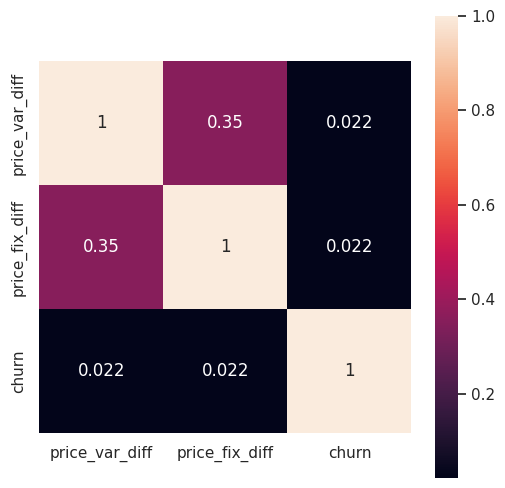

In [ ]:
#plot a correlation heatmap
corr_matrix = df_churn_new.drop('id', axis=1).corr()
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr_matrix, vmax=1, annot=True, square=True);
plt.show()
# The corrletion values is small, it doesn't seem that the change in price is related to churn rate

# Task 3. Feature Engineering

## 3.1. Difference between off-peak prices in December and preceding January

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [ ]:
price_df = pd.read_csv('price_data.csv')
df = pd.read_csv('client_data.csv')

In [ ]:
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [ ]:
print(df.head())
df.info()

                                 id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t      0.00  

In [ ]:
df.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak      imp_cons  margin_gross_pow_ele  \
count                 14606.000000  14606.000000          14606.000000   
mean                     43.130056    152.786896             24.565121   
std                       4.485988    341.369366             20.231172   
min                       0.000000      0.000000              0.000000   
25%                      40.606701      0.000000             14.280000   
50%                      44.311378     37.395000             21.640000   
75%                      44.311378    193.980000             29.880000   
max                      59.266378  15042.790000            374.640000   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        14606.000000  14606.000000  14606.000000     14606.000000   
mean            24.562517      1.292346    189.264522         4.997809   
std             20.230280      0.709774    311.798130         1.611749   
min              0.000000      1.000000      0.000000         1.000000   
25%             14.280000      1.000000     50.712500         4.000000   
50%             21.640000      1.000000    112.530000         5.000000   
75%             29.880000      1.000000    243.097500         6.000000   
max            374.640000     32.000000  24570.650000        13.000000   

            pow_max         churn  
count  14606.000000  14606.000000  
mean      18.135136      0.097152  
std       13.534743      0.296175  
min        3.300000      0.000000  
25%       12.500000      0.000000  
50%       13.856000      0.000000  
75%       19.172500      0.000000  
max      320.000000      1.000000

In [ ]:
print("date_activ")
print(df["date_activ"].max())
print(df["date_activ"].min())

print("date_end")
print(df["date_end"].max())
print(df["date_end"].min())

print("date_modif_prod")
print(df["date_modif_prod"].max())
print(df["date_modif_prod"].min())

print("date_renewal")
print(df["date_renewal"].max())
print(df["date_renewal"].min())

date_activ
2014-09-01 00:00:00
2003-05-09 00:00:00
date_end
2017-06-13 00:00:00
2016-01-28 00:00:00
date_modif_prod
2016-01-29 00:00:00
2003-05-09 00:00:00
date_renewal
2016-01-28 00:00:00
2013-06-26 00:00:00


In [ ]:
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
# price date is only for 2015
print("price_date")
print(price_df["price_date"].max())
print(price_df["price_date"].min())
print(price_df["price_date"].unique())
price_df.head()

price_date
2015-12-01 00:00:00
2015-01-01 00:00:00
['2015-01-01T00:00:00.000000000' '2015-02-01T00:00:00.000000000'
 '2015-03-01T00:00:00.000000000' '2015-04-01T00:00:00.000000000'
 '2015-05-01T00:00:00.000000000' '2015-06-01T00:00:00.000000000'
 '2015-07-01T00:00:00.000000000' '2015-08-01T00:00:00.000000000'
 '2015-09-01T00:00:00.000000000' '2015-10-01T00:00:00.000000000'
 '2015-11-01T00:00:00.000000000' '2015-12-01T00:00:00.000000000']


id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [ ]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()
# Get january and december prices
## return a new DataFrame that contains the first and last row for each group, respectively.
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()
# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1','price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [ ]:
df = pd.merge(df, diff, on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  margin_gross_pow_ele  \
0      2015-11-01   2015-06-23               0.00  ...                 25.44   
1      2009-08-21   2015-08-31             189.95  ...                 16.38   
2      2010-04-16   2015-04-17              47.96  ...                 28.60   
3      2010-03-30   2015-03-31             240.04  ...                 30.22   
4      2010-01-13   2015-03-09             445.75  ...                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up pow_max  churn  \
0  lxidpiddsbxsbosboudacockeimpuepw  43.648      1   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws  13.800      0   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws  13.856      0   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws  13.200      0   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws  19.800      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0                         0.020057                        3.700961  
1                        -0.003767                        0.177779  
2                        -0.004670                        0.177779  
3                        -0.004547                        0.177779  
4                        -0.006192                        0.162916  

[5 rows x 28 columns]

(-5.0, 5.0)

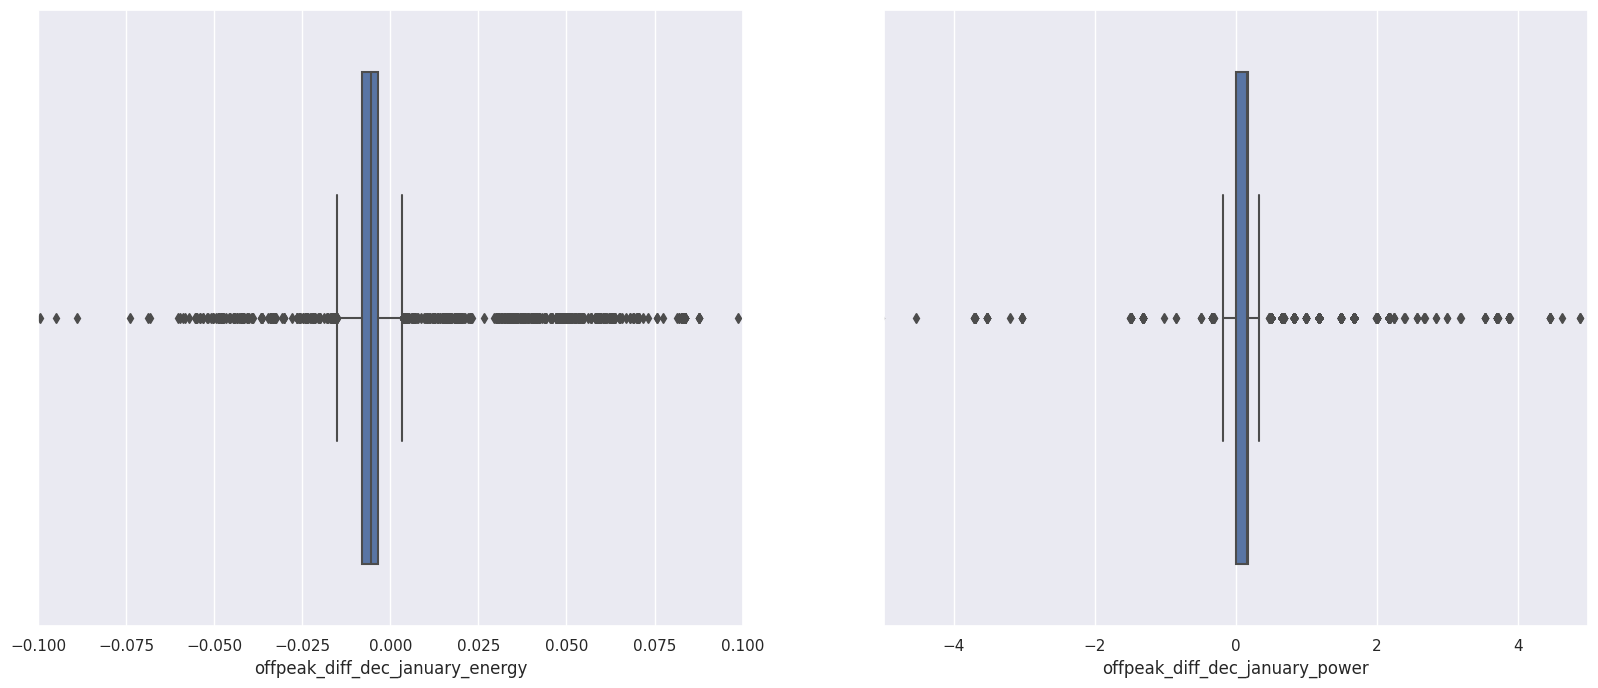

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20,8))
sns.boxplot(data=diff, x='offpeak_diff_dec_january_energy', ax=axes[0])
sns.boxplot(data=diff, x='offpeak_diff_dec_january_power', ax=axes[1])
axes[0].set_xlim(-0.1,0.1)
axes[1].set_xlim(-5,5)

## Average price changes across periods

Features that look at mean average price differences across different time periods (`off_peak`, `peak`, `mid_peak`). The dec-jan feature may reveal macro patterns that occur over an entire year, whereas inter-time-period features may reveal patterns on a micro scale between months.

In [ ]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean',
    'price_peak_var': 'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'
}).reset_index()

In [ ]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [ ]:
columns = [
    'id',
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff',
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff',
    'peak_mid_peak_fix_mean_diff',
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  pow_max  churn  \
0      2015-11-01   2015-06-23               0.00  ...   43.648      1   
1      2009-08-21   2015-08-31             189.95  ...   13.800      0   
2      2010-04-16   2015-04-17              47.96  ...   13.856      0   
3      2010-03-30   2015-03-31             240.04  ...   13.200      0   
4      2010-01-13   2015-03-09             445.75  ...   19.800      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0                         0.020057                        3.700961   
1                        -0.003767                        0.177779   
2                        -0.004670                        0.177779   
3                        -0.004547                        0.177779   
4                        -0.006192                        0.162916   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   
2                     0.082090                     0.088421   
3                     0.151210                     0.000000   
4                     0.020536                     0.030773   

  off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                        0.058257                    18.590255   
1                        0.149609                    44.311375   
2                        0.170512                    44.385450   
3                        0.151210                    44.400265   
4                        0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  
0                     7.450670                        26.040925  
1                     0.000000                        44.311375  
2                     0.000000                        44.385450  
3                     0.000000                        44.400265  
4                     8.137629                        24.412893  

[5 rows x 34 columns]

## Max price changes across periods and months

The big price change between months could affect churn.

In [ ]:
mean_prices_by_month = price_df.groupby(['id','price_date']).agg({
    'price_off_peak_var':'mean',
    'price_peak_var': 'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'
}).reset_index()

In [ ]:
## Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [ ]:
mean_prices_by_month.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1  0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2  0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3  0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4  0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0        0.103975            0.070232           40.565969       24.339581   
1        0.103975            0.070232           40.565969       24.339581   
2        0.105842            0.073773           40.728885       24.437330   
3        0.105842            0.073773           40.728885       24.437330   
4        0.105842            0.073773           40.728885       24.437330   

   price_mid_peak_fix  off_peak_peak_var_mean_diff  \
0           16.226389                     0.022123   
1           16.226389                     0.022123   
2           16.291555                     0.022225   
3           16.291555                     0.022225   
4           16.291555                     0.022225   

   peak_mid_peak_var_mean_diff  off_peak_mid_peak_var_mean_diff  \
0                     0.033743                         0.055866   
1                     0.033743                         0.055866   
2                     0.032069                         0.054294   
3                     0.032069                         0.054294   
4                     0.032069                         0.054294   

   off_peak_peak_fix_mean_diff  peak_mid_peak_fix_mean_diff  \
0                    16.226389                     8.113192   
1                    16.226389                     8.113192   
2                    16.291555                     8.145775   
3                    16.291555                     8.145775   
4                    16.291555                     8.145775   

   off_peak_mid_peak_fix_mean_diff  
0                        24.339581  
1                        24.339581  
2                        24.437330  
3                        24.437330  
4                        24.437330

In [ ]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [ ]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.149609                    44.311375   
2                         0.170512                    44.385450   
3                         0.151210                    44.400265   
4                         0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                     7.450670                        26.040925   
1                     0.000000                        44.311375   
2                     0.000000                        44.385450   
3                     0.000000                        44.400265   
4                     8.137629                        24.412893   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.060550                            0.085483   
1                            0.151367                            0.085483   
2                            0.084587                            0.089162   
3                            0.153133                            0.000000   
4                            0.022225                            0.033743   

  off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                               0.146033                           44.266930   
1                               0.151367                           44.444710   
2                               0.172468                           44.444710   
3                               0.153133                           44.444710   
4                               0.055866                           16.291555   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  
0                            8.145775                                44.26693  
1                            0.000000                                44.44471  
2                            0.000000                                44.44471  
3                            0.000000                                44.44471  
4                            8.145775                                24.43733  

[5 rows x 40 columns]

## Tenure
How long a client has been as PowerGo

In [ ]:
# calculate the tenure by year and convert to int
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [ ]:
df.groupby(['tenure']).agg({'churn':'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
3       0.143713
2       0.133080
4       0.125756
13      0.095238
5       0.085425
12      0.083333
6       0.080713
7       0.073394
11      0.063584
8       0.048000
9       0.024096
10      0.020000

Most client stay for around 2-4 years, and there's a surge in churn rate at 5th year.

## Transform dates into months
Since date format is not useful for precdictive models, we need to convert them into more useful format.

- months_activ = Number of months active until reference date (Jan 2016)
- months_to_end = Number of months of the contract left until reference date (Jan 2016)
- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [ ]:
def convert_months(reference_date, df, column):
  time_delta = reference_date - df[column]
  months = (time_delta/np.timedelta64(1,'M')).astype(int)
  return months

In [ ]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

In [ ]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  peak_mid_peak_var_max_monthly_diff  \
0                        0.114481  ...                            0.085483   
1                        0.145711  ...                            0.085483   
2                        0.165794  ...                            0.089162   
3                        0.146694  ...                            0.000000   
4                        0.116900  ...                            0.033743   

   off_peak_mid_peak_var_max_monthly_diff off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                          44.266930   
1                                0.151367                          44.444710   
2                                0.172468                          44.444710   
3                                0.153133                          44.444710   
4                                0.055866                          16.291555   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                            8.145775                                44.26693   
1                            0.000000                                44.44471   
2                            0.000000                                44.44471   
3                            0.000000                                44.44471   
4                            8.145775                                24.43733   

   tenure  months_activ  months_to_end  months_modif_prod months_renewal  
0       3            30              5                  2              6  
1       7            76              7                 76              4  
2       6            68              3                 68              8  
3       6            69              2                 69              9  
4       6            71              2                 71              9  

[5 rows x 41 columns]

## Categorical data

### has_gas

In [ ]:
df['has_gas'] = df['has_gas'].replace(['t','f'], [1,0])
df.groupby(['has_gas']).agg({'churn':'mean'})

churn
has_gas          
0        0.100544
1        0.081856

### channel_sales

In [ ]:
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

one-hot-encoding and drop the 3 minimum count values

In [ ]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  tenure  months_activ  months_to_end  \
0                    0.098142  ...       3            30              5   
1                    0.000000  ...       7            76              7   
2                    0.087899  ...       6            68              3   
3                    0.000000  ...       6            69              2   
4                    0.100015  ...       6            71              2   

   months_modif_prod  months_renewal  channel_MISSING  \
0                  2               6                0   
1                 76               4                1   
2                 68               8                0   
3                 69               9                0   
4                 71               9                1   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 45 columns]

### origin_up
same as channel_sales

In [ ]:
# Let's see how many categories are within this column
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                    0.098142  ...                  2               6   
1                    0.000000  ...                 76               4   
2                    0.087899  ...                 68               8   
3                    0.000000  ...                 69               9   
4                    0.100015  ...                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 47 columns]

## Numerical data - Deal with skewness

In [ ]:
skewed = [
    'cons_12m',
    'cons_gas_12m',
    'cons_last_month',
    'forecast_cons_12m',
    'forecast_cons_year',
    'forecast_discount_energy',
    'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak',
    'forecast_price_pow_off_peak',
    'imp_cons'
]

print(df[skewed].describe())

           cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000

In [ ]:
# use log transform for variables with high standard deviation
# Apply log10 transformation +1 is to ensure the results is positive
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [ ]:
print(df[skewed].describe())

           cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14606.000000  14606.000000     14606.000000       14606.000000   
mean       4.223939      0.779244         2.264646           2.962177   
std        0.884515      1.717071         1.769305           0.683592   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.754023      0.000000         0.000000           2.695477   
50%        4.149727      0.000000         2.899547           3.046836   
75%        4.610285      0.000000         3.529430           3.380716   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean             1.784610                  0.966726                 1.517203   
std              1.584986                  5.108289                 0.571481   
min              0.000

<ipython-input-32-f63759cfd0e3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
<ipython-input-32-f63759cfd0e3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
<ipython-input-32-f63759cfd0e3>:5: U

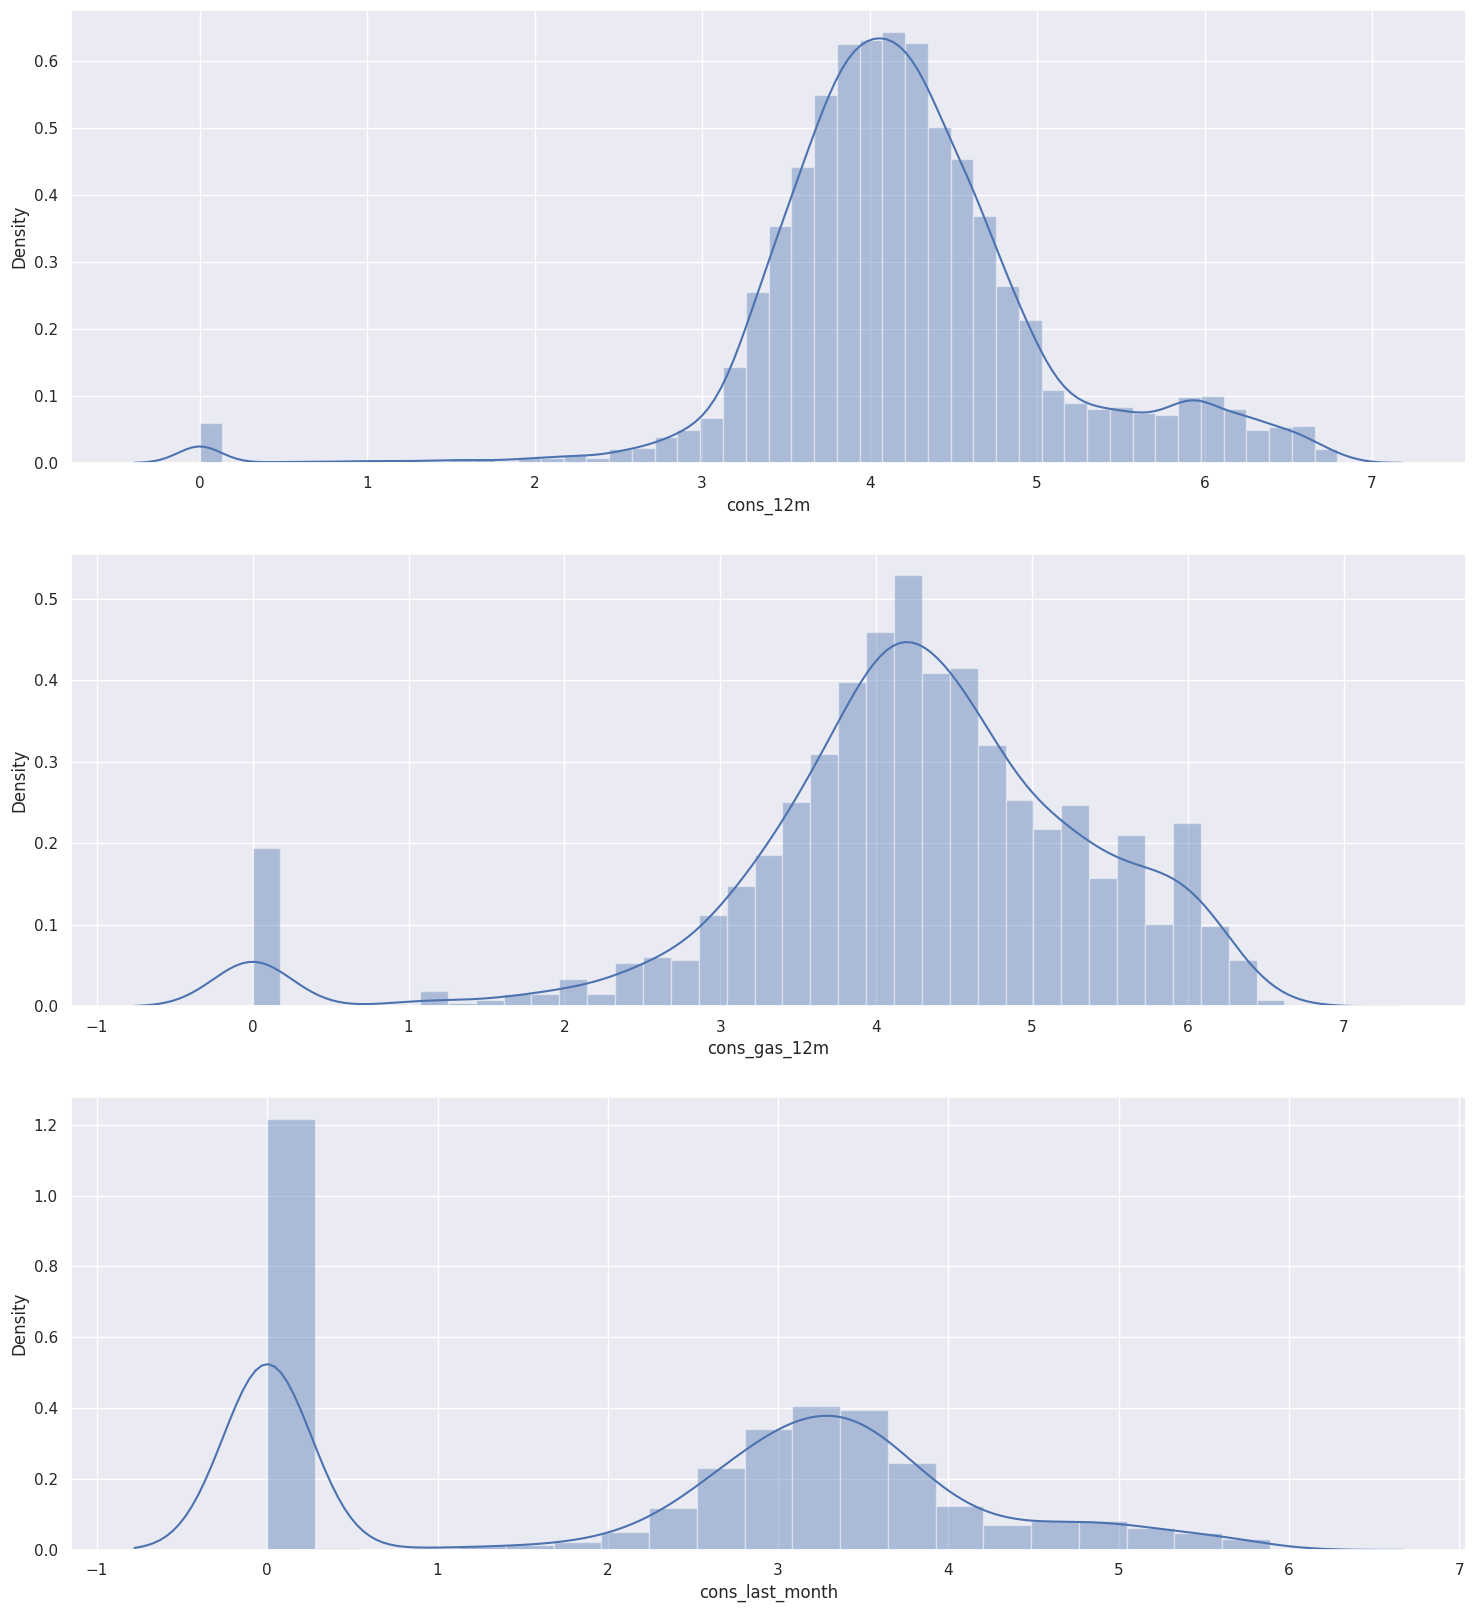

In [ ]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

## Remove highly correlated features

In [ ]:
corr_matrix = df.corr()

<ipython-input-33-b69b4b6a6184>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

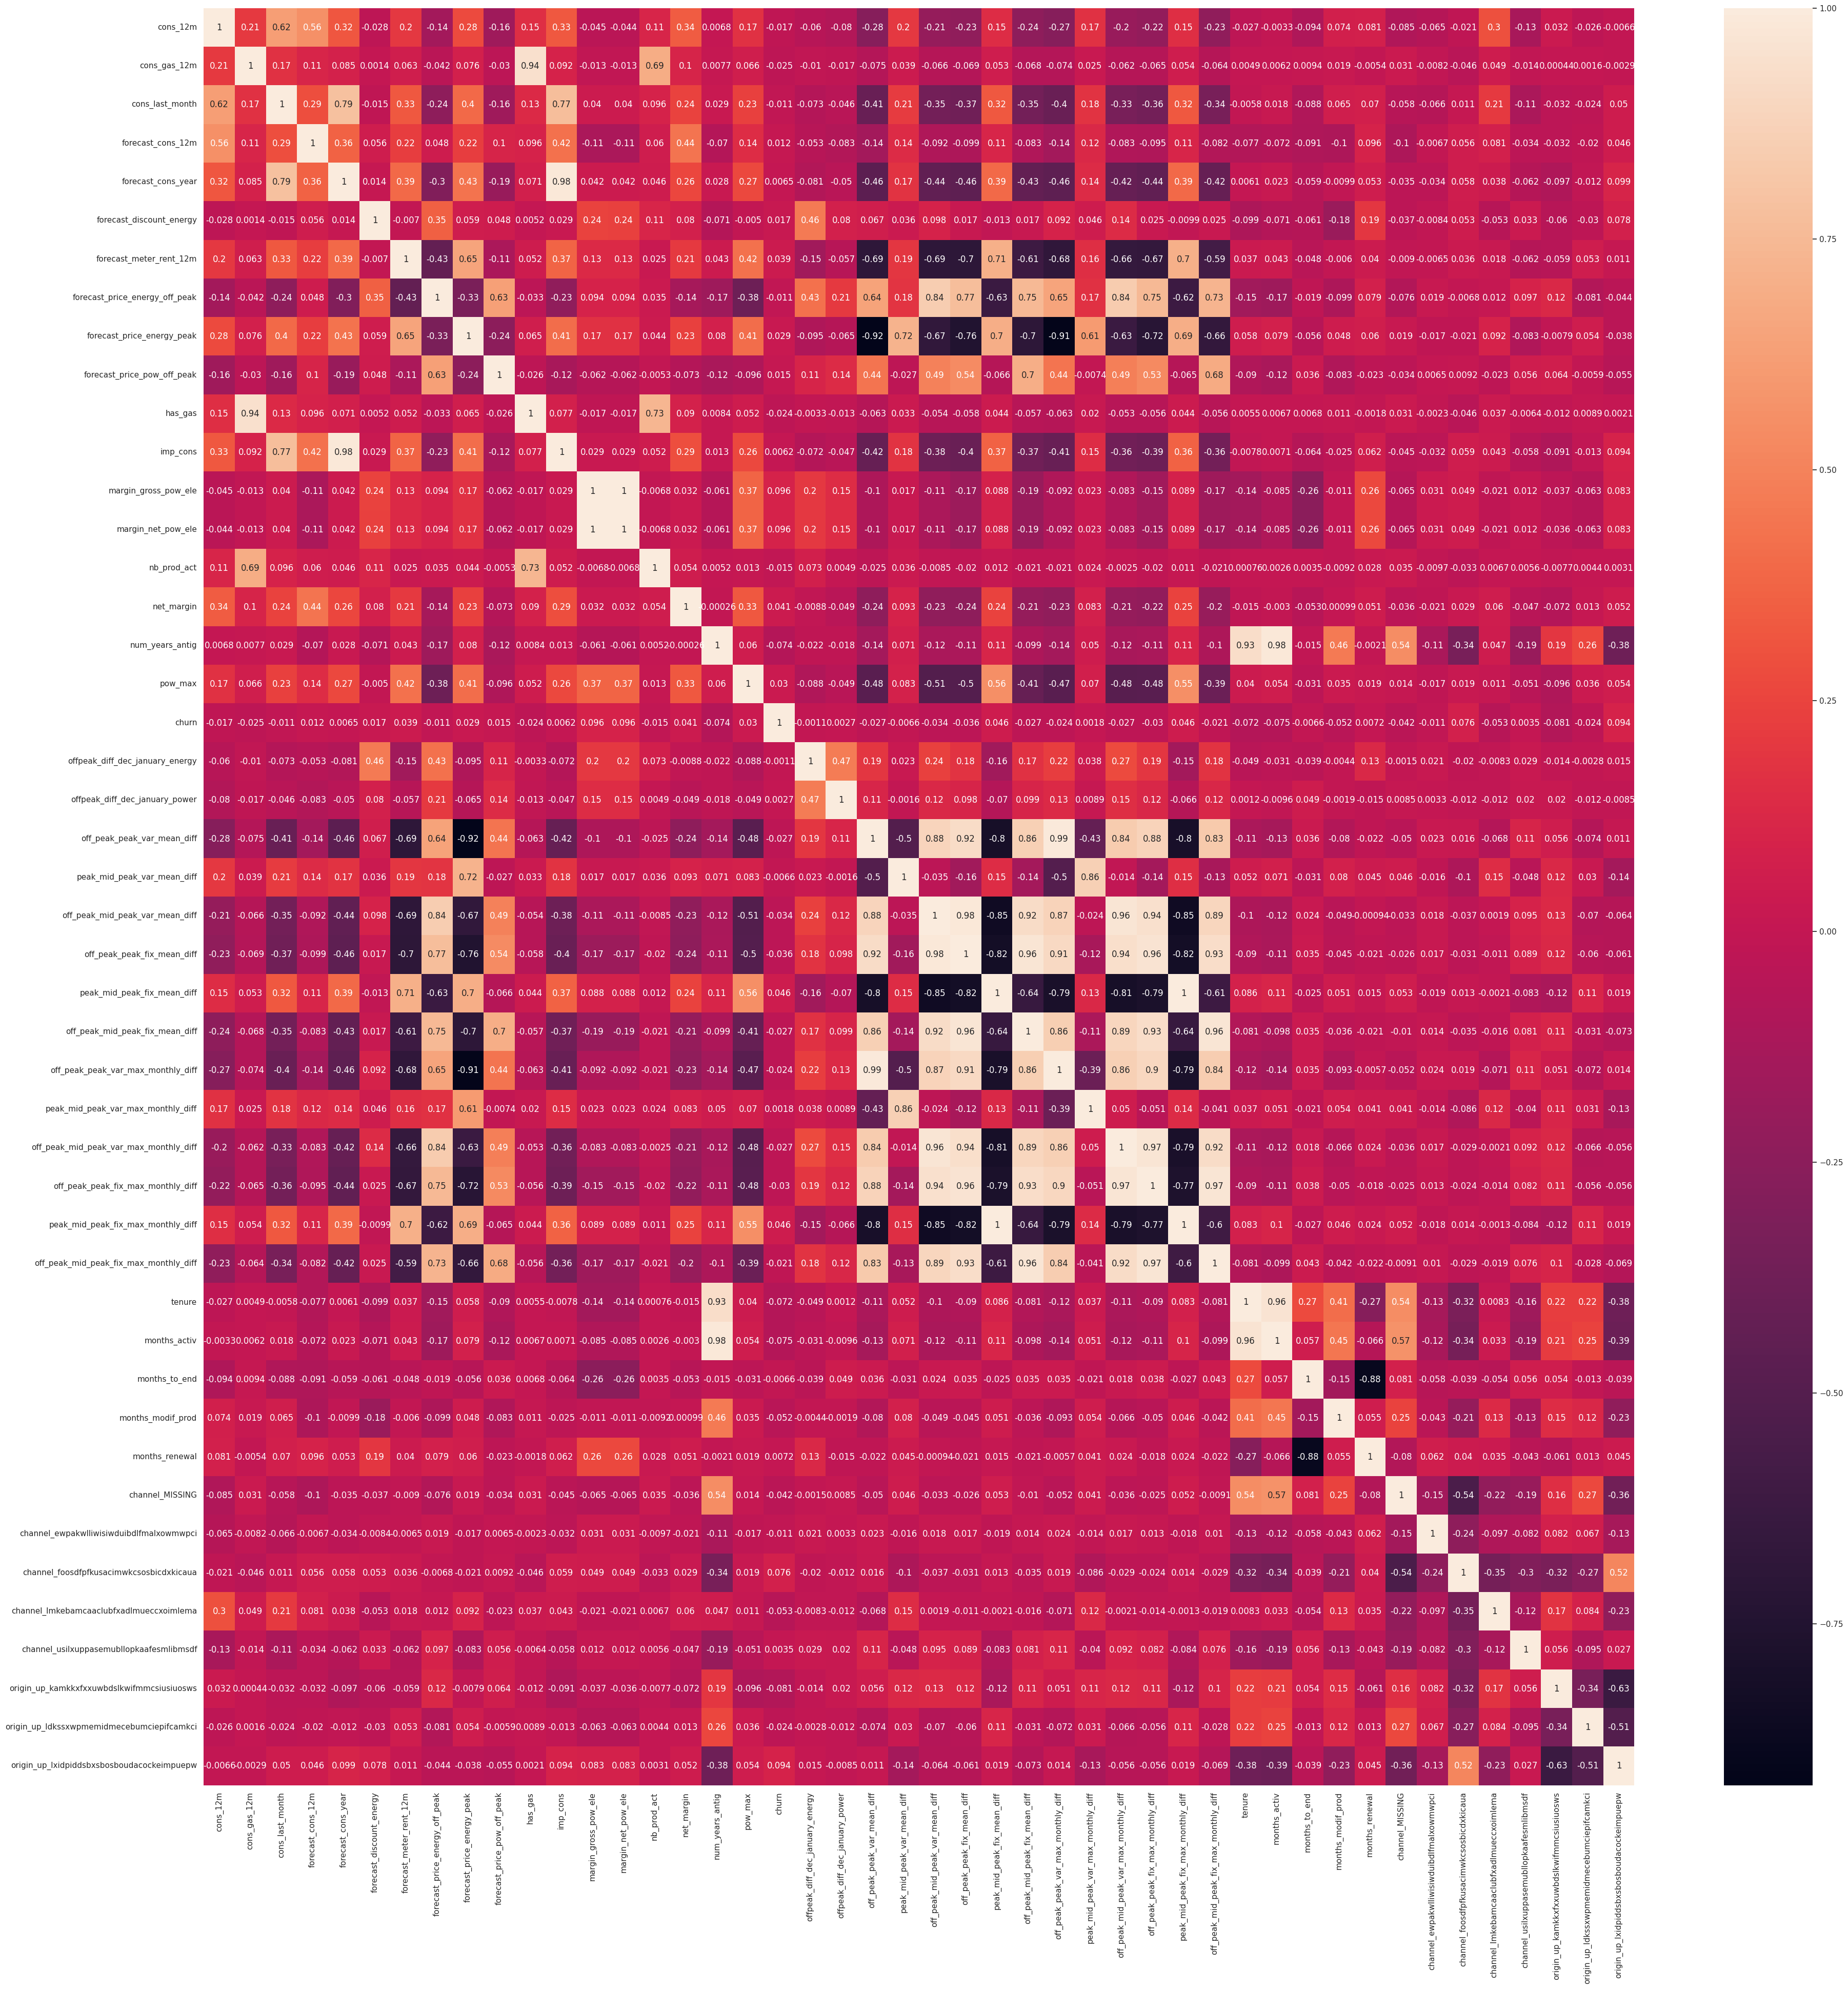

In [ ]:
plt.figure(figsize=(45,45))
sns.heatmap(corr_matrix, annot=True, annot_kws={'size':12})

In [ ]:
# threshold above which is considered too high of a correlation
corr_threshold = 0.8

# Create correlation matrix
corr_matrix = corr_matrix.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than the correlation threshold
to_drop_corr = [column for column in upper.columns if any(upper[column] >= corr_threshold)]
print(to_drop_corr)

['has_gas', 'imp_cons', 'margin_net_pow_ele', 'off_peak_peak_var_mean_diff', 'off_peak_mid_peak_var_mean_diff', 'off_peak_peak_fix_mean_diff', 'peak_mid_peak_fix_mean_diff', 'off_peak_mid_peak_fix_mean_diff', 'off_peak_peak_var_max_monthly_diff', 'peak_mid_peak_var_max_monthly_diff', 'off_peak_mid_peak_var_max_monthly_diff', 'off_peak_peak_fix_max_monthly_diff', 'peak_mid_peak_fix_max_monthly_diff', 'off_peak_mid_peak_fix_max_monthly_diff', 'tenure', 'months_activ', 'months_renewal']


<ipython-input-35-0cce5774d177>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
df_train = df.drop(to_drop_corr, axis=1)

## 3.2. Modeling with Random Forest

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Train-test split and fit

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(columns=['churn','id']),
                                                   df_train.churn,
                                                   random_state=42,
                                                   test_size=0.2)
# scale train - test set
# scaler = StandardScaler()
# X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
# X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11684, 28)
(11684,)
(2922, 28)
(2922,)


In [ ]:
# Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Evaluate

In [ ]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))
print(classification_report(y_test,y_pred))

Accuracy of Decision Tree classifier on test set: 0.90
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2617
           1       0.88      0.05      0.09       305

    accuracy                           0.90      2922
   macro avg       0.89      0.52      0.52      2922
weighted avg       0.90      0.90      0.86      2922



As the dataset is very imbalanced, the recall on label 1 is very low. However, as the precision score for label 1 is not to bad, the chance that we mistake a customer as churned-one is bearable, we could focus on the actual-churn instead.

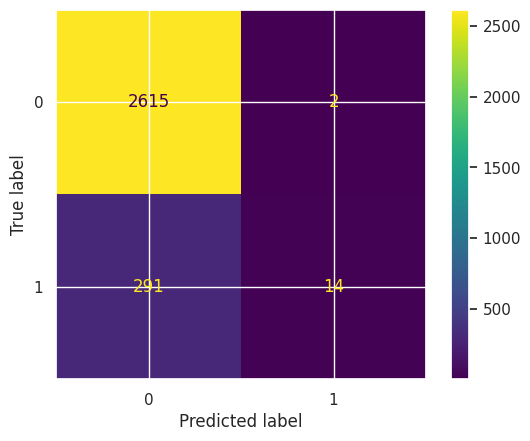

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Feature Importance

In the Random Forest case,
the feature importance represents the number of times each feature is used for splitting across all
trees.

In [ ]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

In [ ]:
print(feature_importances)
feature_importances.info()

In [ ]:
range(len(feature_importances))

range(0, 28)

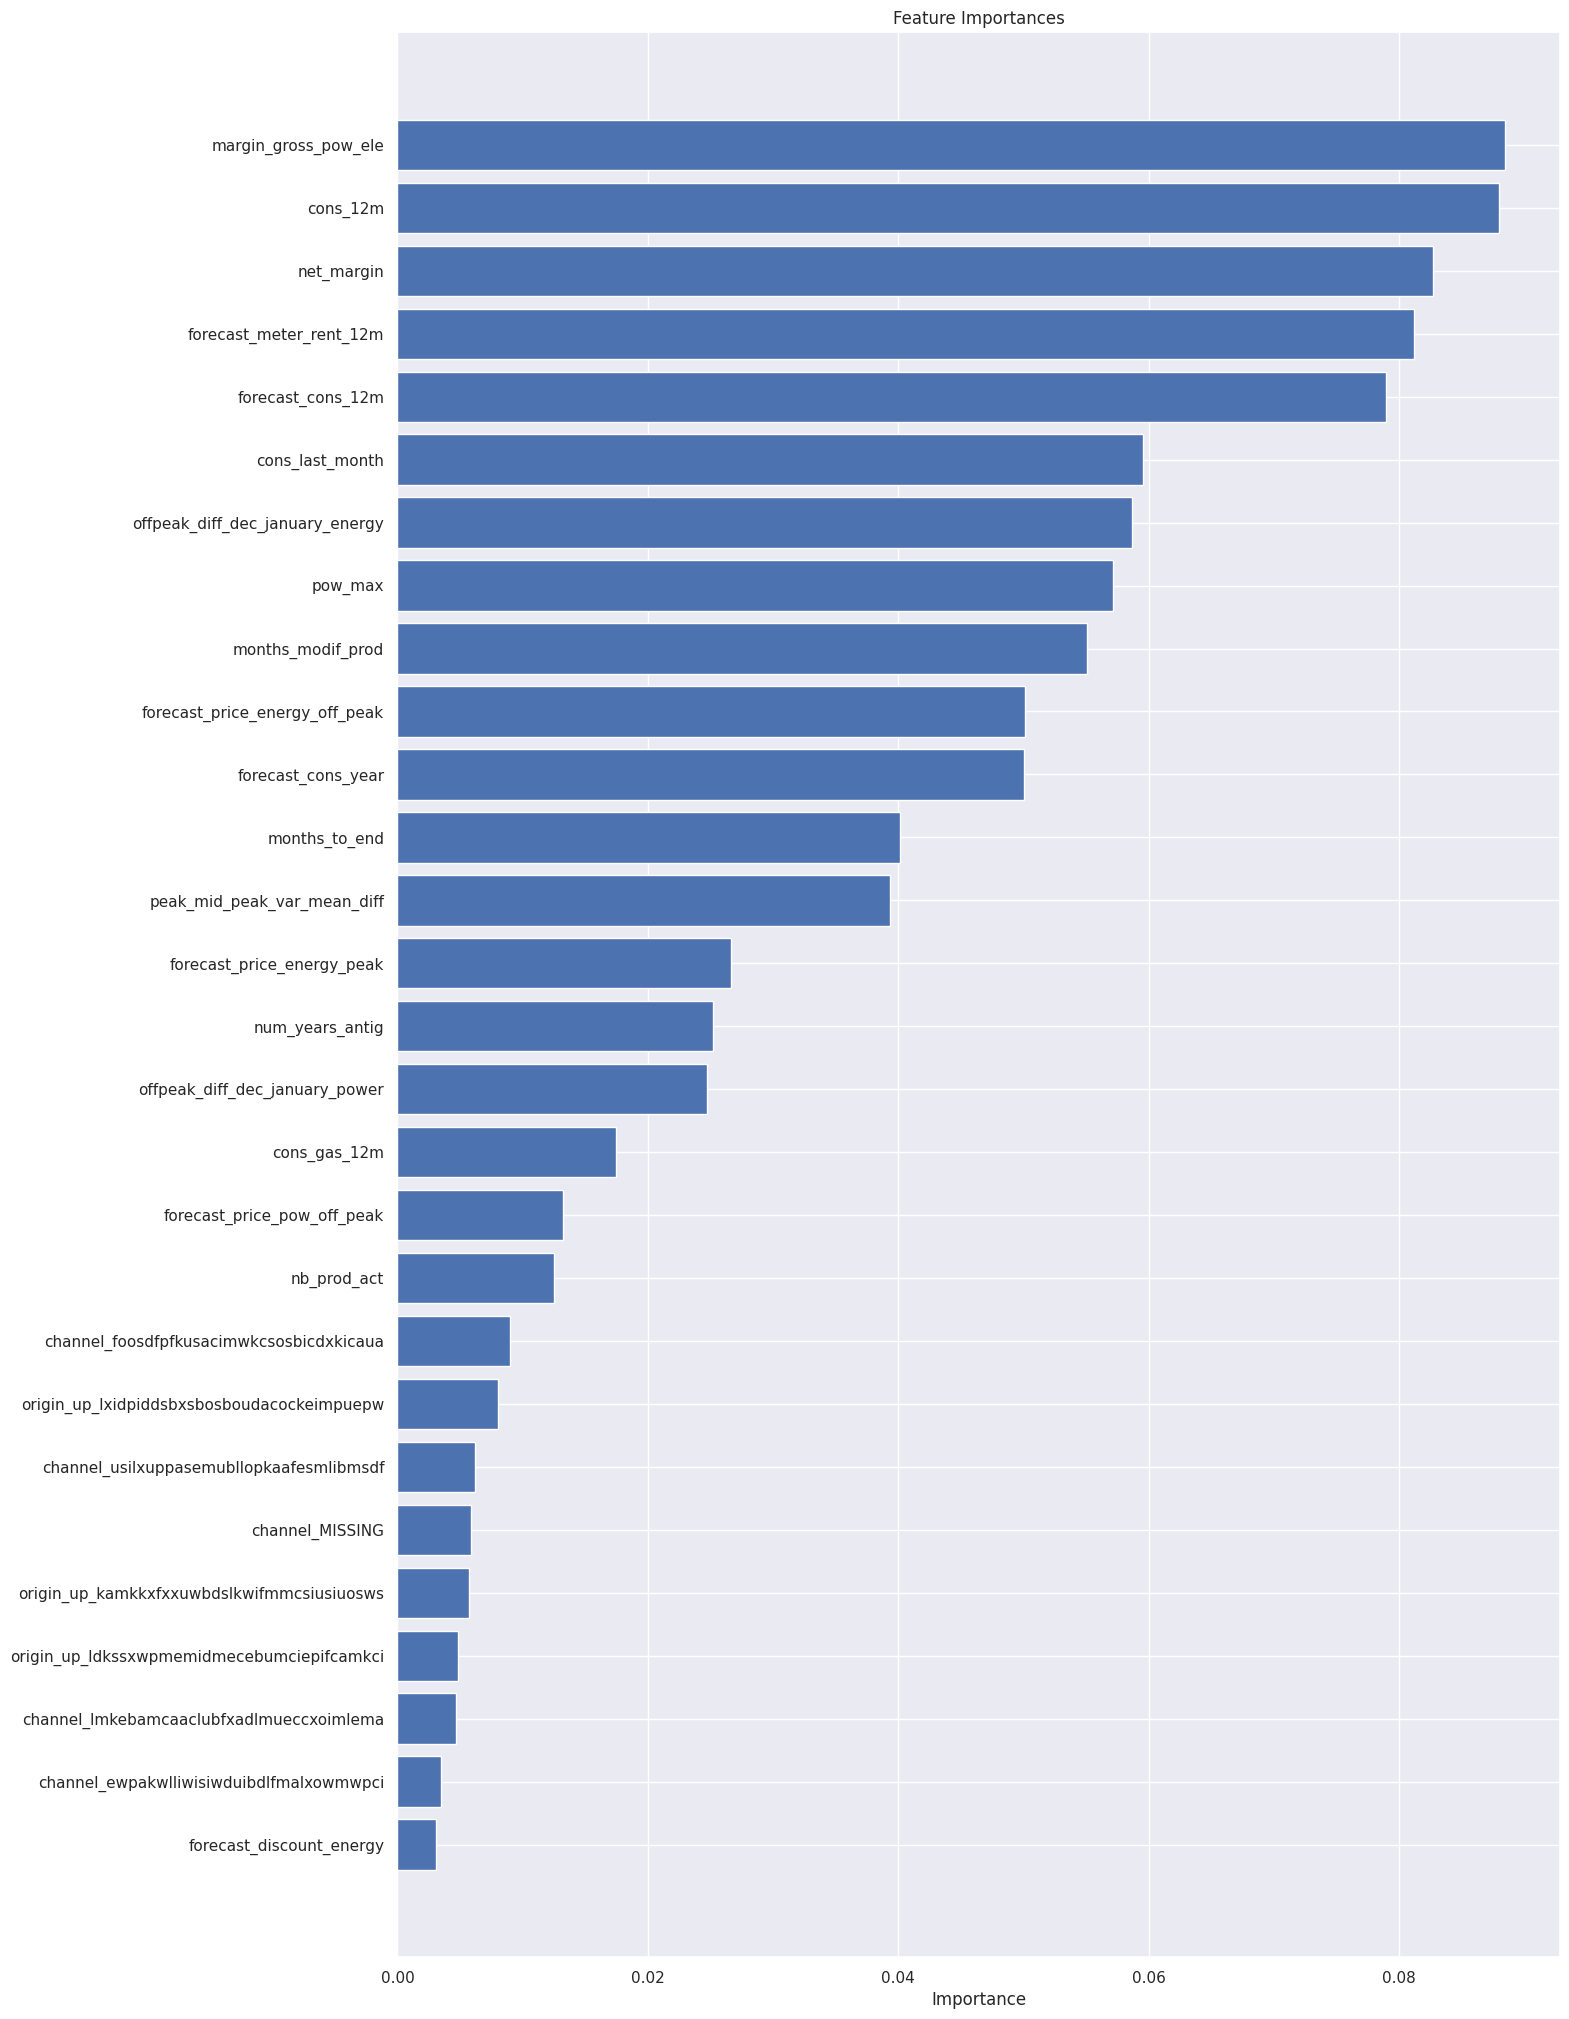

In [ ]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

Price may not be the main driver but the weak contributor. CHeck the probability

In [ ]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [ ]:
probabilities

array([0.12, 0.1 , 0.05, ..., 0.08, 0.02, 0.35])

In [ ]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [ ]:
X_test['churn'] = y_pred.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')

## 3.3 Bonus task - discount impact

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
test_df = pd.read_csv('./out_of_sample_data_with_predictions.csv')
test_df.head()

Unnamed: 0  cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0           0  4.173390      4.193598         3.165541           3.168368   
1           1  4.075036      0.000000         3.003461           3.305998   
2           2  3.848435      0.000000         0.000000           2.756568   
3           3  4.345433      0.000000         0.000000           3.516690   
4           4  4.185655      0.000000         3.355834           3.208148   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0            3.165541                       0.0                 2.073828   
1            3.003461                      30.0                 1.255031   
2            0.000000                       0.0                 1.289366   
3            0.000000                       0.0                 1.304921   
4            3.355834                       0.0                 2.123067   

   forecast_price_energy_off_peak  forecast_price_energy_peak  ...  \
0                        0.114667                    0.099548  ...   
1                        0.198096                    0.000000  ...   
2                        0.141434                    0.000000  ...   
3                        0.142996                    0.000000  ...   
4                        0.120372                    0.103487  ...   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                0                                         0   
2                0                                         0   
3                0                                         0   
4                0                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         1   
2                                         1   
3                                         1   
4                                         1   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           1   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  churn  churn_probability  
0                                           1      0               0.12  
1                                           1      0               0.10  
2                                           1      0               0.05  
3                                           1      0               0.09  
4                                           0      0               0.06  

[5 rows x 31 columns]

### Calculate the baseline revenue

The goal is to forcast the revenue for each customer of the test data for the next 12 months. This is based on the forcast energy consumption and meter rent for 12 months.

Assumed that the customer churn somewhere between January 2016 and the start of March 2016. In this assumption, the revenue will be reduced by 91.9% (not churn at all: revenue is 100%, churn at the start of Match: revenue 83.9% => the average is 91.9%).

In [ ]:
# only calculate the revenue for electricity for now
# deal with the log10 transformation in the prevous steps
test_df['basecase_revenue'] = np.power(10, test_df['forecast_cons_12m'] + 1)*test_df['forecast_price_energy_off_peak'] + test_df['forecast_meter_rent_12m']

# revenue after churn
test_df['basecase_revenue_after_churn'] = test_df['basecase_revenue']*(1 - 0.919 * test_df['churn'])

In [ ]:
test_df.head()

Unnamed: 0  cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0           0  4.173390      4.193598         3.165541           3.168368   
1           1  4.075036      0.000000         3.003461           3.305998   
2           2  3.848435      0.000000         0.000000           2.756568   
3           3  4.345433      0.000000         0.000000           3.516690   
4           4  4.185655      0.000000         3.355834           3.208148   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0            3.165541                       0.0                 2.073828   
1            3.003461                      30.0                 1.255031   
2            0.000000                       0.0                 1.289366   
3            0.000000                       0.0                 1.304921   
4            3.355834                       0.0                 2.123067   

   forecast_price_energy_off_peak  forecast_price_energy_peak  ...  \
0                        0.114667                    0.099548  ...   
1                        0.198096                    0.000000  ...   
2                        0.141434                    0.000000  ...   
3                        0.142996                    0.000000  ...   
4                        0.120372                    0.103487  ...   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         1   
2                                         1   
3                                         1   
4                                         1   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           1   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  churn  churn_probability  \
0                                           1      0               0.12   
1                                           1      0               0.10   
2                                           1      0               0.05   
3                                           1      0               0.09   
4                                           0      0               0.06   

   basecase_revenue  basecase_revenue_after_churn  
0       1691.760873                   1691.760873  
1       4008.756921                   4008.756921  
2        808.750215                    808.750215  
3       4700.396574                   4700.396574  
4       1946.022532                   1946.022532  

[5 rows x 33 columns]

### The benefits and costs if applied discounts

First, choose a cut off probability. The customer who is above this churn probability will receive discounts.

Calculate revenue with these assumptions:
- All the clients who received discounts would accept
- Those received discounts would not churn in the next 12 months
- Those did not received the discounts will churn (based on the predicted churn values)
- The customers will consume the same amount of electricity regardless of the price change

We will have 2 senarios:
- True positive: how the revenue retention compared to no discount revenue
- False positive: the reduced revenue for giving the customers who aren't actually churn the discounts

Then we need to find the optimal cut-off probability to balanced out the 2 scenarios.

In [ ]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given => customer stays for full year, independent of whether the prediction
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

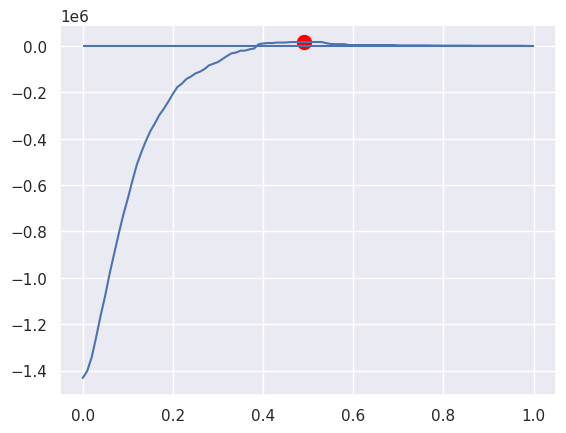

Maximum benefit at cutoff 0.49 with revenue delta of $17,541.88


In [ ]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    # Plot the revenue deltas
    rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='red')
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)

### Use the forcast proability instead of churn

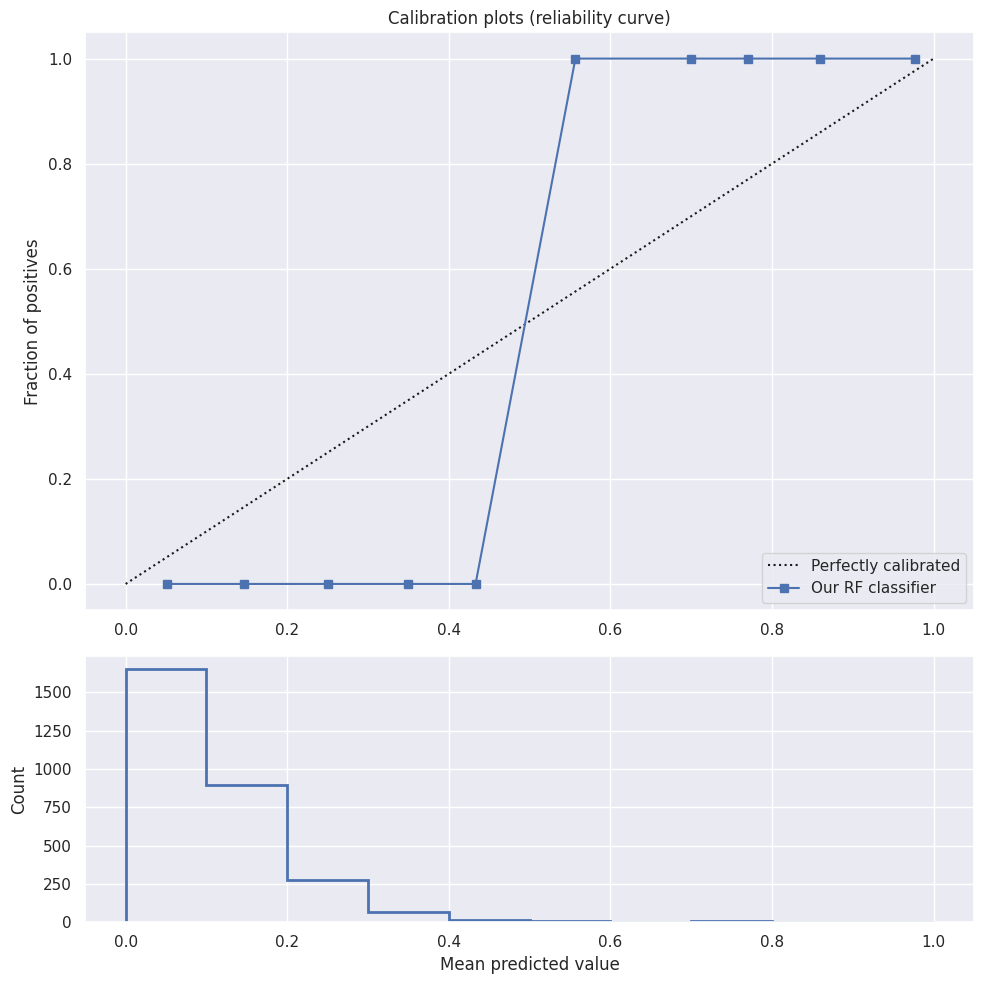

In [ ]:
# Check our calibration
# (code copied from https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html)
from sklearn.calibration import calibration_curve

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_true=test_df['churn'],
    y_prob=test_df['churn_probability'],
    n_bins=10
)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="Our RF classifier")
ax2.hist(test_df['churn_probability'], range=(0, 1), bins=10, histtype="step", lw=2)
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
plt.tight_layout()

In [ ]:
# Electricity evenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more d
# Note that we need to reverse the log10-transformation from the data cleaning step
test_df['basecase_revenue'] = np.power(10, test_df['forecast_cons_12m']) * test_df['forecast_price_energy_off_peak'] + test_df['forecast_meter_rent_12m']
# Taking churn into account
test_df['basecase_revenue_after_churn'] = test_df['basecase_revenue'] * (1 - 0.919 * test_df['churn_probability'])

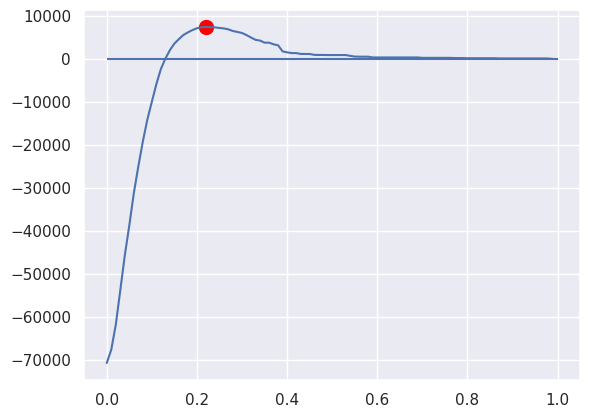

Maximum benefit at cutoff 0.22 with revenue delta of $7,415.82


In [ ]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
plot_tradeoff(rev_deltas)

### How to select the discount?